In [3]:
#Import the libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, accuracy_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [4]:
input_df=pd.read_csv('telecom_churn_data.csv')
input_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## Filter high value Customer


In [5]:
high_value_threshold_df = ((input_df['av_rech_amt_data_6'] * input_df['total_rech_data_6']).fillna(0) + (input_df['av_rech_amt_data_7'] * input_df['total_rech_data_7']).fillna(0) +
input_df['total_rech_amt_6'].fillna(0) + input_df['total_rech_amt_7'].fillna(0))/2
high_value_threshold = np.percentile(high_value_threshold_df, 70.0)
high_value_threshold

478.0

In [6]:
required_input_df = input_df[high_value_threshold_df >= high_value_threshold]
required_input_df.shape[0]

30001

In [7]:
required_input_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4

## Assign churn

In [8]:
required_input_df['churn'] = np.where(required_input_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
required_input_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00

In [9]:
round(required_input_df['churn'].value_counts()/len(required_input_df)*100, 2)

0    91.86
1     8.14
Name: churn, dtype: float64

The no: of high valued customers are around 30K out of which only 8% seemed to churn.

### Removing _9 suffixed columns

In [10]:
cols_to_drop = [col for col in required_input_df.columns if '_9' in col]
required_input_df.drop(cols_to_drop, axis=1, inplace=True)

required_input_df.shape

(30001, 173)


# Data Preprocessing


#### Converting last date of recharge

In [11]:
for col in ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6',
            'date_of_last_rech_data_7','date_of_last_rech_data_8']:
    required_input_df[col] = required_input_df.apply(lambda row: 1 if not pd.isnull(row[col]) else 0, axis=1)
required_input_df.shape

(30001, 173)

#### Removing constant columns

In [12]:
for col in required_input_df.columns:
    if required_input_df[col].nunique() == 1:
        required_input_df.drop(col,axis=1,inplace = True)

#### Compensate for null values

In [13]:
null_series = (required_input_df.isnull().sum() * 100 / len(required_input_df)).sort_values(ascending = False)
null_series

arpu_2g_8                   46.825106
arpu_3g_8                   46.825106
av_rech_amt_data_8          46.825106
count_rech_3g_8             46.825106
night_pck_user_8            46.825106
max_rech_data_8             46.825106
fb_user_8                   46.825106
count_rech_2g_8             46.825106
total_rech_data_8           46.825106
av_rech_amt_data_6          44.148528
max_rech_data_6             44.148528
total_rech_data_6           44.148528
arpu_2g_6                   44.148528
arpu_3g_6                   44.148528
night_pck_user_6            44.148528
count_rech_2g_6             44.148528
fb_user_6                   44.148528
count_rech_3g_6             44.148528
arpu_3g_7                   43.145228
arpu_2g_7                   43.145228
count_rech_2g_7             43.145228
count_rech_3g_7             43.145228
max_rech_data_7             43.145228
av_rech_amt_data_7          43.145228
night_pck_user_7            43.145228
total_rech_data_7           43.145228
fb_user_7   

Drop all the columns with more than 30% null values.

In [14]:
null_cols = null_series[null_series>30.0].index.tolist()
required_input_df.drop(null_cols, axis=1,inplace = True)
required_input_df.shape

(30001, 133)

In [15]:
null_series = (required_input_df.isnull().sum() * 100 / len(required_input_df)).sort_values(ascending = False)
null_series

loc_ic_mou_8                3.913203
std_og_mou_8                3.913203
loc_og_t2c_mou_8            3.913203
loc_og_mou_8                3.913203
std_og_t2t_mou_8            3.913203
std_og_t2m_mou_8            3.913203
std_og_t2f_mou_8            3.913203
spl_og_mou_8                3.913203
isd_ic_mou_8                3.913203
spl_ic_mou_8                3.913203
std_ic_mou_8                3.913203
loc_og_t2m_mou_8            3.913203
std_ic_t2f_mou_8            3.913203
std_ic_t2m_mou_8            3.913203
std_ic_t2t_mou_8            3.913203
loc_ic_t2f_mou_8            3.913203
loc_ic_t2m_mou_8            3.913203
loc_ic_t2t_mou_8            3.913203
isd_og_mou_8                3.913203
og_others_8                 3.913203
loc_og_t2f_mou_8            3.913203
ic_others_8                 3.913203
roam_ic_mou_8               3.913203
loc_og_t2t_mou_8            3.913203
offnet_mou_8                3.913203
roam_og_mou_8               3.913203
onnet_mou_8                 3.913203
o

Drop rows with null values

In [16]:
null_cols = null_series[null_series>0.0].index.tolist()
for col in null_cols:
    required_input_df = required_input_df[~required_input_df[col].isna()]
required_input_df.shape

(28504, 133)

In [17]:
(required_input_df.isnull().sum() * 100 / len(required_input_df)).sort_values(ascending = False)

churn                       0.0
spl_og_mou_8                0.0
std_og_t2m_mou_6            0.0
std_og_t2m_mou_7            0.0
std_og_t2m_mou_8            0.0
std_og_t2f_mou_6            0.0
std_og_t2f_mou_7            0.0
std_og_t2f_mou_8            0.0
std_og_mou_6                0.0
std_og_mou_7                0.0
std_og_mou_8                0.0
isd_og_mou_6                0.0
isd_og_mou_7                0.0
isd_og_mou_8                0.0
spl_og_mou_6                0.0
spl_og_mou_7                0.0
og_others_6                 0.0
loc_ic_mou_7                0.0
og_others_7                 0.0
og_others_8                 0.0
total_og_mou_6              0.0
total_og_mou_7              0.0
total_og_mou_8              0.0
loc_ic_t2t_mou_6            0.0
loc_ic_t2t_mou_7            0.0
loc_ic_t2t_mou_8            0.0
loc_ic_t2m_mou_6            0.0
loc_ic_t2m_mou_7            0.0
loc_ic_t2m_mou_8            0.0
loc_ic_t2f_mou_6            0.0
loc_ic_t2f_mou_7            0.0
loc_ic_t

In [18]:
required_input_df.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            

### Check for cross-correlation

In [19]:
required_input_df.corr()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
mobile_number,1.000000,0.033922,0.025331,0.029794,0.008875,0.003339,0.004306,0.017339,0.007464,0.014245,0.010610,-0.002831,0.004013,0.005198,-0.002480,-0.004525,0.046186,0.042936,0.042073,0.075415,0.073329,0.076617,0.048924,0.050274,0.054623,-0.013468,-0.014440,-0.008200,0.080696,0.077769,0.078728,-0.017406,-0.021753,-0.018550,-0.028791,-0.032988,-0.028930,0.024769,0.017535,0.021313,-0.030445,-0.036385,-0.031221,-0.003093,-0.002464,-0.003054,-0.020461,-0.022807,-0.016320,-0.006670,-0.001167,0.000426,0.017208,0.007673,0.013271,0.030104,0.026928,0.030344,0.059289,0.053614,0.056374,0.053416,0.054727,0.052188,0.065016,0.060082,0.062534,-0.002155,0.002671,-0.002120,-0.012880,-0.013553,-0.016001,0.014319,0.011080,0.012687,-0.008438,-0.006714,-0.011197,0.053997,0.048823,0.049543,-0.024695,-0.003850,-0.032432,0.003704,0.001459,0.000484,0.013392,0.008815,0.008525,-0.035392,-0.051597,-0.046970,0.033352,0.028439,0.028352,0.064745,0.060885,0.065233,-0.004627,0.002866,-0.013427,0.050811,0.054328,0.047399,-0.011208,-0.010255,-0.001140,-0.014394,-0.020489,-0.020396,-0.010518,-0.004951,-0.000850,0.010980,0.008212,0.005440,-0.043838,-0.045508,-0.037676,0.010408,0.011327,0.018497,-0.015118,-0.014496,-0.010149,0.315375,-0.031351,-0.028307,-0.034185,-0.009248,-0.018953
arpu_6,0.033922,1.000000,0.717481,0.663516,0.343666,0.227770,0.200824,0.516198,0.356831,0.307798,0.120665,0.087266,0.096381,0.191755,0.151179,0.132664,0.167727,0.132166,0.129936,0.336023,0.255962,0.231605,0.141450,0.119906,0.110673,0.043907,0.010183,0.012218,0.331850,0.256770,0.236778,0.275172,0.170613,0.144774,0.302808,0.189435,0.151770,0.067165,0.055092,0.046594,0.388018,0.242143,0.197700,0.457902,0.442803,0.436984,0.122160,0.071615,0.048491,0.053351,0.025597,0.016231,0.561058,0.383829,0.327044,0.080442,0.064116,0.065592,0.188691,0.154424,0.131260,0.050306,0.039404,0.039098,0.181131,0.147271,0.131280,0.080035,0.064056,0.061361,0.096086,0.068654,0.066771,0.035377,0.034000,0.024233,0.118989,0.089438,0.084761,0.220443,0.176143,0.160625,0.027491,-0.035103,-0.010994,0.087995,

Remove highly correlated columns.

In [20]:
correlation_matrix = required_input_df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

threshold = 0.7
to_drop = set()
for i in range(len(upper_triangle.columns)):
    col = upper_triangle.columns[i]
    if any(upper_triangle[col] > threshold):
        col_cor_list = upper_triangle[upper_triangle[col]>0.7].index.tolist()
        print('column: '+col+' index: ',col_cor_list)
        if len(to_drop - set(col_cor_list)) == (len(to_drop)-len(col_cor_list)):
            pass
        else:
            to_drop.add(col)

df_reduced = required_input_df.drop(columns=to_drop)
df_reduced

column: arpu_7 index:  ['arpu_6']
column: arpu_8 index:  ['arpu_7']
column: onnet_mou_7 index:  ['onnet_mou_6']
column: onnet_mou_8 index:  ['onnet_mou_7']
column: offnet_mou_7 index:  ['offnet_mou_6']
column: offnet_mou_8 index:  ['offnet_mou_7']
column: loc_og_t2t_mou_7 index:  ['loc_og_t2t_mou_6']
column: loc_og_t2t_mou_8 index:  ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7']
column: loc_og_t2m_mou_7 index:  ['loc_og_t2m_mou_6']
column: loc_og_t2m_mou_8 index:  ['loc_og_t2m_mou_7']
column: loc_og_t2f_mou_7 index:  ['loc_og_t2f_mou_6']
column: loc_og_t2f_mou_8 index:  ['loc_og_t2f_mou_7']
column: loc_og_mou_6 index:  ['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6']
column: loc_og_mou_7 index:  ['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_6']
column: loc_og_mou_8 index:  ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7']
column: std_og_t2t_mou_6 index:  ['onnet_mou_6']
column: std_og_t2t_mou_7 index:  ['onnet_mou_7', 'std_og_t2t_mou_6']
column: std_og_t2t_mou_8 index: 

,mobile_number,arpu_6,arpu_8,onnet_mou_6,onnet_mou_8,offnet_mou_6,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_t2f_mou_8,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_8,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_8,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,3171.480,57.84,52.29,453.43,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,308.63,162.28,62.13,53.23,0.00,0.00,0.00,533.91,23.29,31.76,6.66,16.68,60.86,77.84,0.0,4.50,0.00,6.50,0.00,0.0,0.0,609.24,58.14,217.56,152.16,39.53,355.23,36.89,30.39,91.44,141.33,52.19,22.21,173.08,0.21,0.0,0.0,2.06,31.59,15.74,15.19,5,5,1580,790,1580,1,1,1,0,0,779,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,802,57.74,18.74,0.00,1
8,7001524846,378.721,137.362,413.69,35.08,94.66,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,80.96,50.54,0.00,0.00,0.00,0.00,7.15,288.18,133.43,10.04,0.00,0.00,130.26,98.28,0.0,0.00,0.00,10.23,0.00,0.0,0.0,431.66,23.84,57.58,0.00,0.00,23.83,0.00,0.10,22.43,0.65,0.00,0.00,4.66,0.00,0.0,0.0,0.00,0.00,0.00,0.00,19,21,90,154,30,1,1,1,50,0,10,0,1,1,0.00,356.00,0.03,0.00,750.95,0,1,0,0,3,0,0,0,0,0,0,315,21.03,122.16,0.00,0
21,7002124215,514.453,637.760,102.41,85.14,757.93,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,91.81,104.81,0.75,1.58,0.00,0.00,0.00,94.09,125.94,808.74,0.00,0.00,763.29,938.79,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1028.79,2.48,118.23,4.61,10.39,87.68,14.06,0.18,67.69,101.74,0.00,0.00,44.21,0.00,0.0,0.0,0.00,0.00,0.00,0.00,22,26,50,50,50,1,1,1,30,20,50,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0
23,7000887461,74.350,366.966,48.96,33.58,85.41,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,82.94,148.56,0.00,0.00,0.00,0.00,17.71,133.68,0.00,6.35,0.00,0.00,2.36,39.61,0.0,0.10,0.00,17.71,0.00,0.0,0.0,140.04,20.71,95.91,0.00,0.71,174.41,0.51,13.38,2.43,43.91,0.00,0.00,14.89,0.00,0.0,0.0,0.00,3.74,0.00,5.35,3,5,0,179,179,1,1,1,0,179,0,0,1,1,0.00,0.48,0.01,0.00,599.09,0,0,0,0,0,0,2,1,0,0,1,604,40.45,0.00,0.00,0
33,7000149764,977.020,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.56,0.00,0.0,0.0,0.00,1.75,0.00,1.73,0.16,0.88,0.00,0.05,2.95,0.86,0.23,0.13,5.66,0.00,0.0,0.0,0.00,0.00,1.23,0.65,7,14,252,1255,455,1,1,1,252,0,455,1,1,1,87.05,57.76,7.97,3509.90,8154.65,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,1714.67,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,7000630859,384.316,393.474,78.68,103.24,56.13,61.44,0.00,0.00,0.00,0.00,0.00,0.00,72.53,52.21,55.59,0.00,5.76,3.91,0.00,0.00,49.94,0.00,0.00,0.00,0.00,6.15,14.01,0.0,3.91,7.20,0.08,0.00,0.0,0.0,57.14,285.33,93.36,0.30,40.41

## EDA

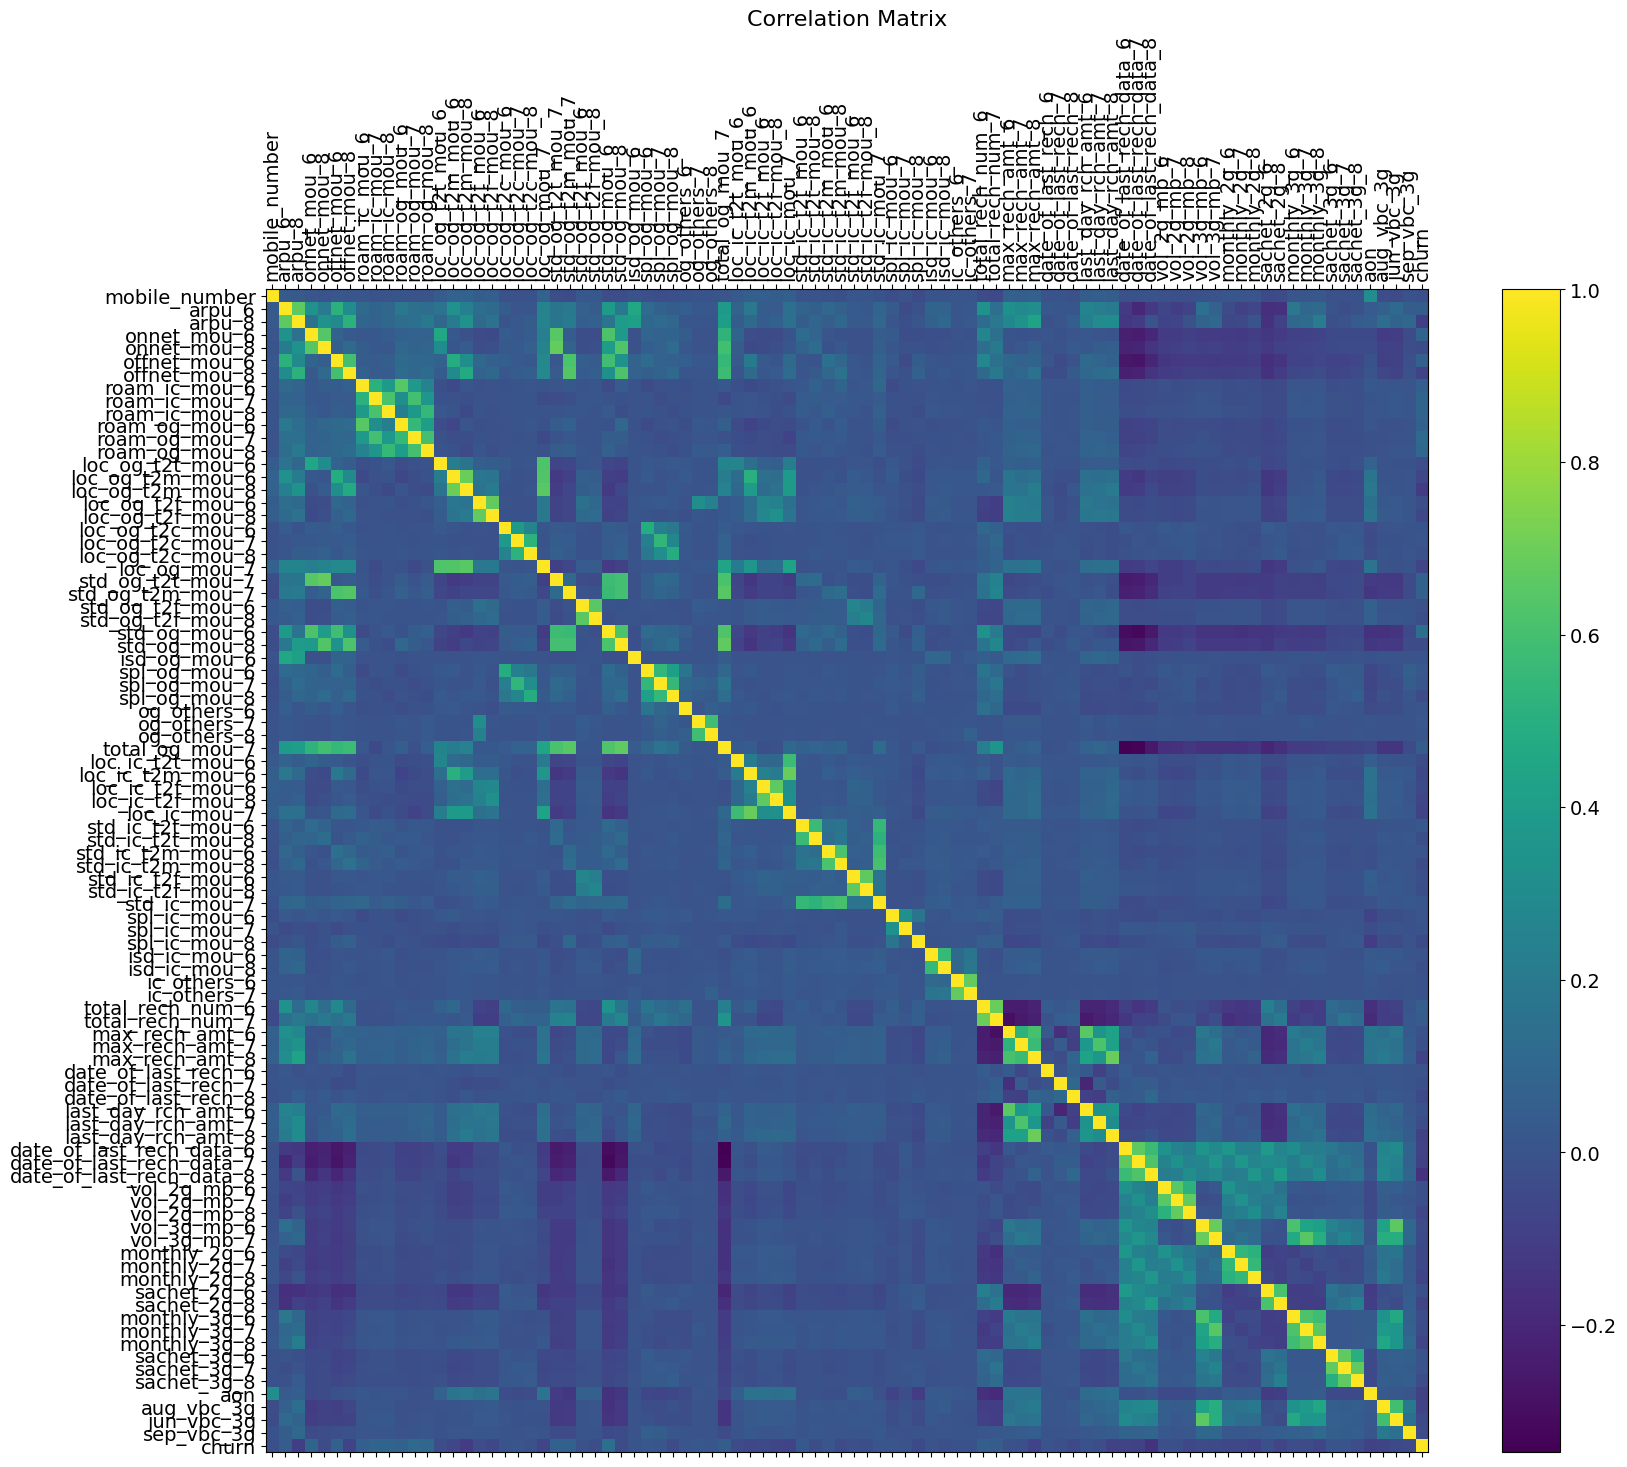

In [158]:
#corr = df_reduced.corr()
f = plt.figure(figsize=(19, 15))
plt.matshow(df_reduced.corr(), fignum=f.number)
plt.xticks(range(df_reduced.select_dtypes(['number']).shape[1]), df_reduced.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_reduced.select_dtypes(['number']).shape[1]), df_reduced.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
plot_df = df_reduced.select_dtypes(include =[np.number])
for col1, col2 in combinations(plot_df.columns, 2):
    sns.scatterplot(data=plot_df, x=col1, y=col2, hue='churn')
    plt.show()

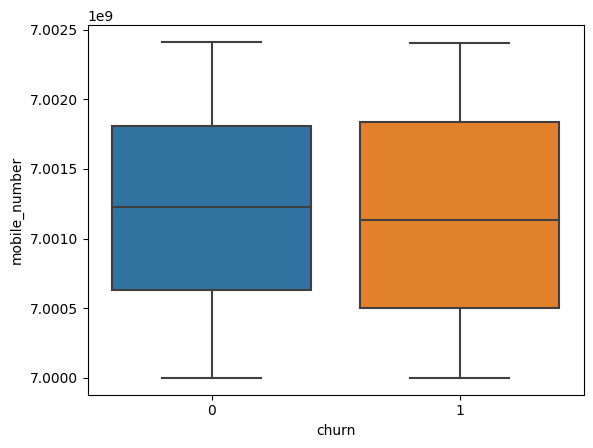

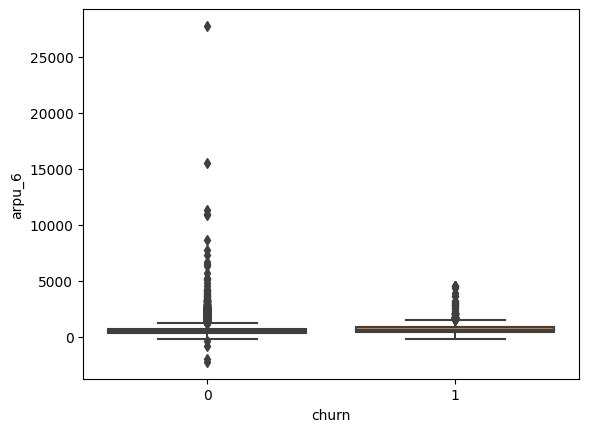

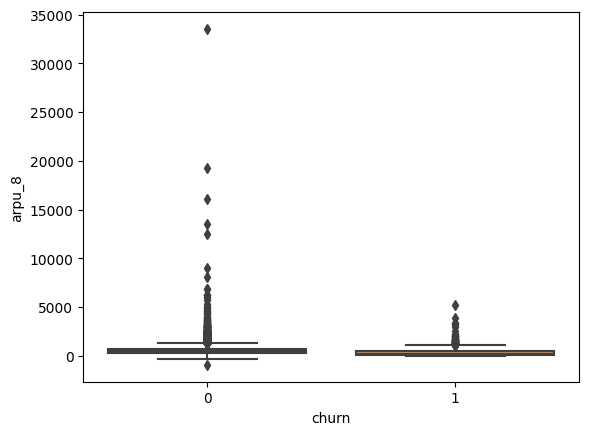

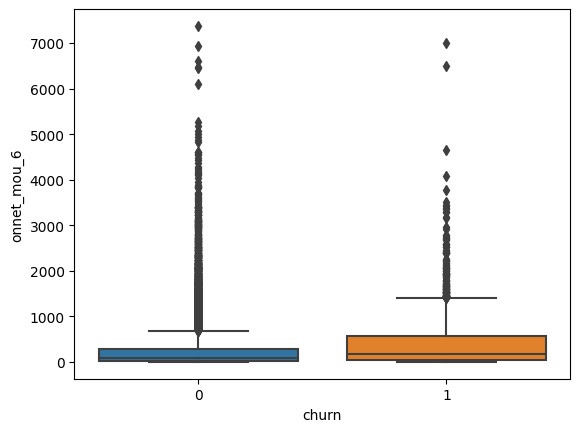

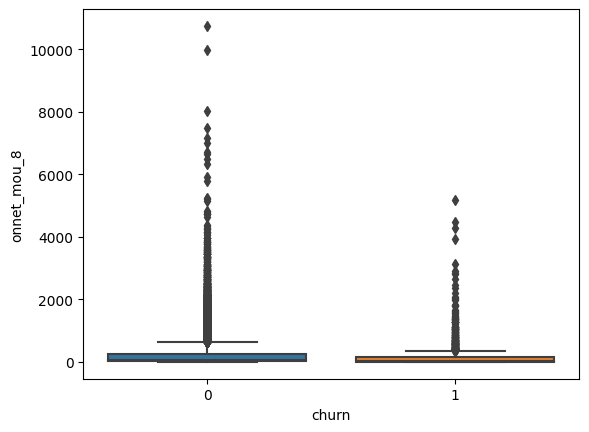

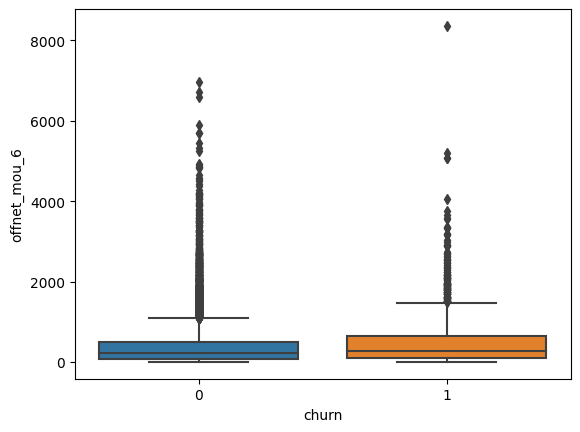

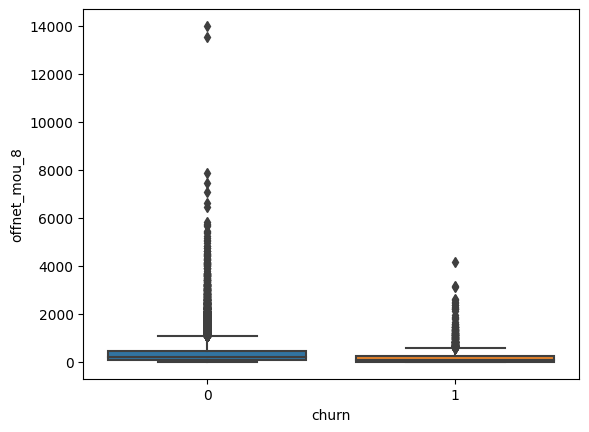

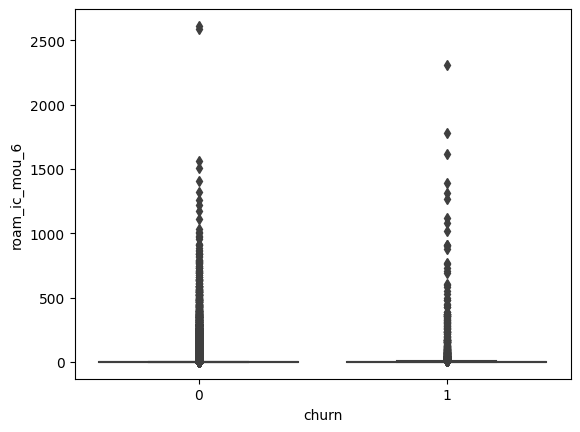

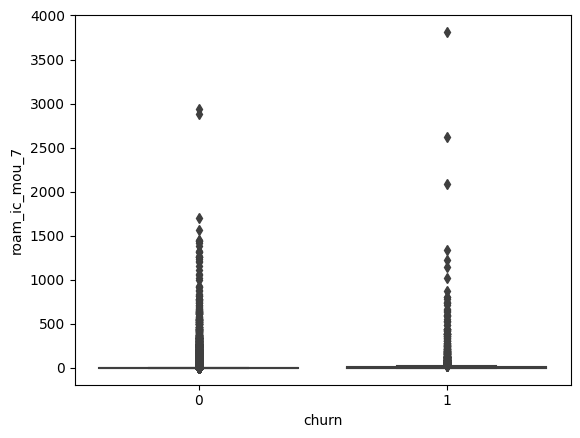

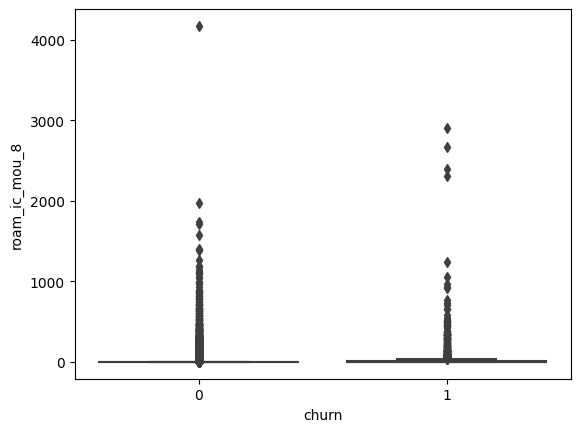

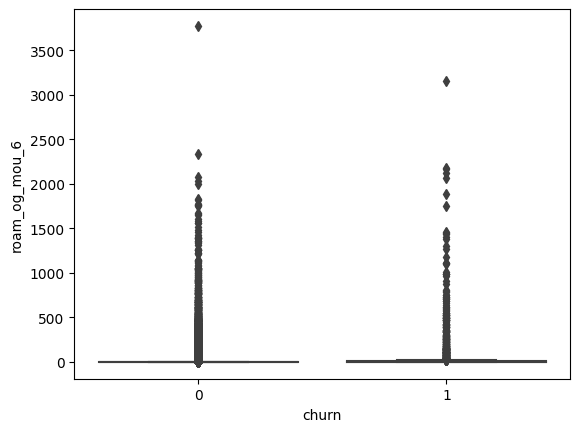

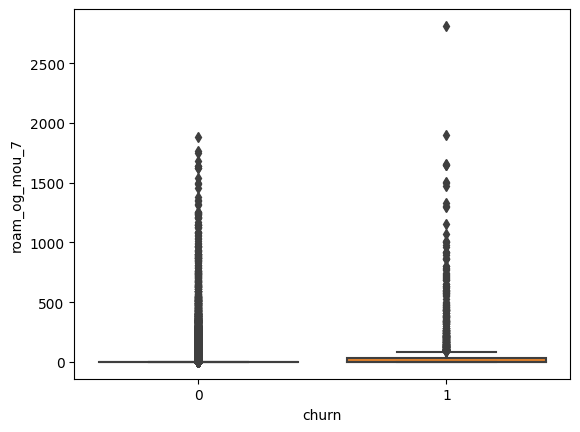

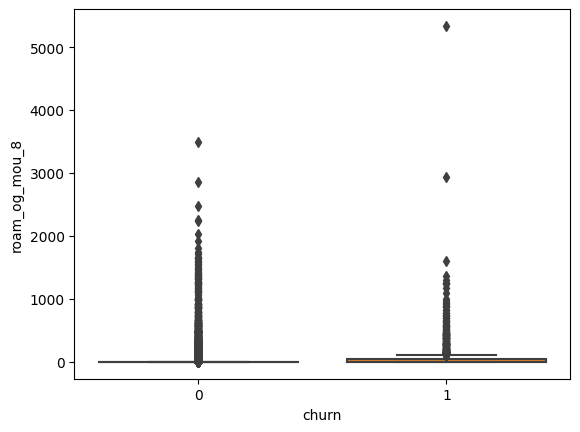

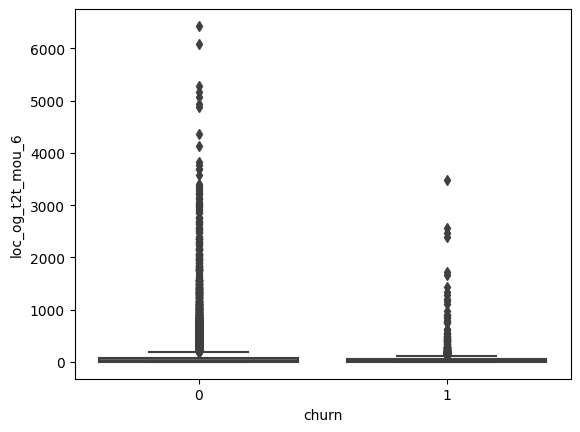

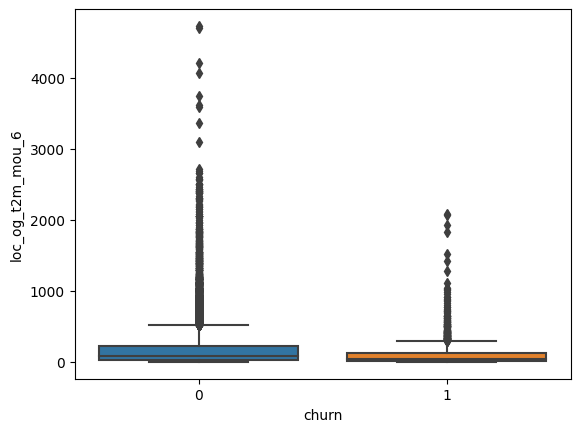

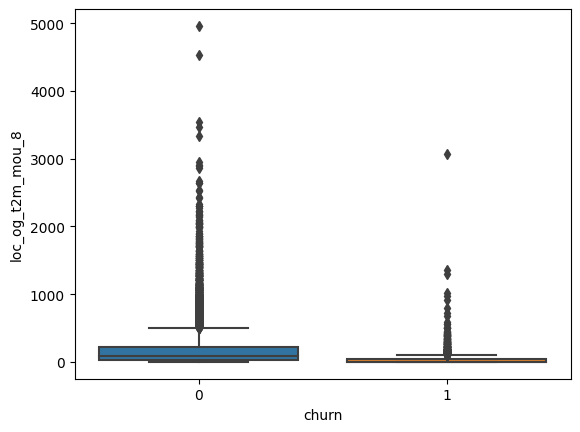

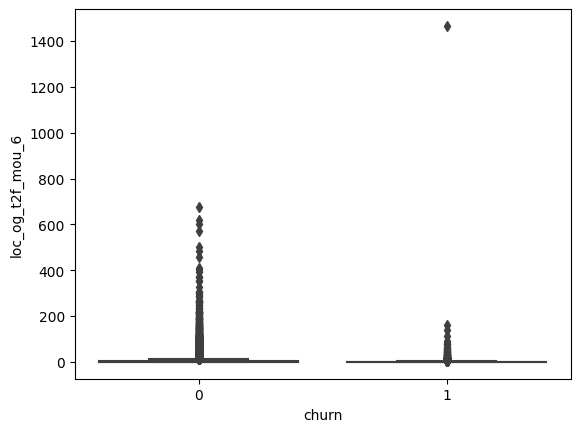

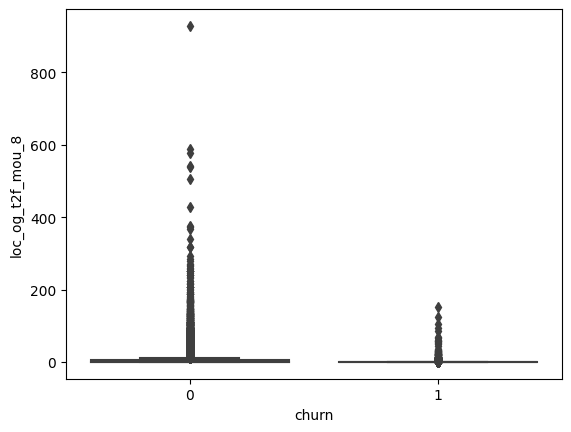

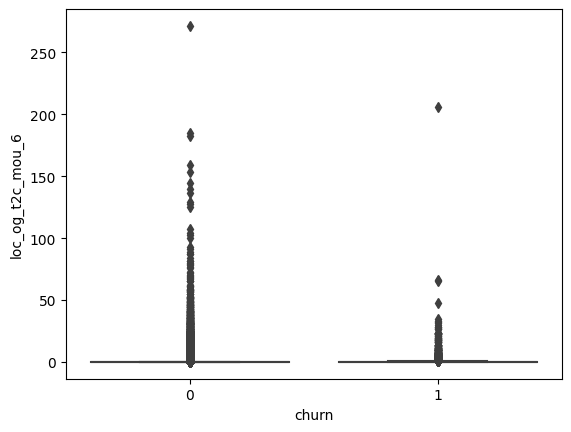

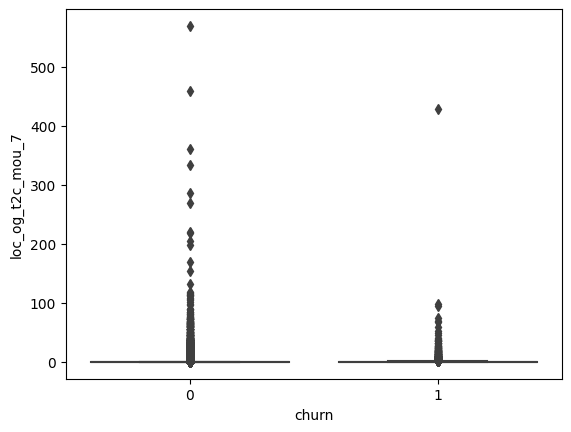

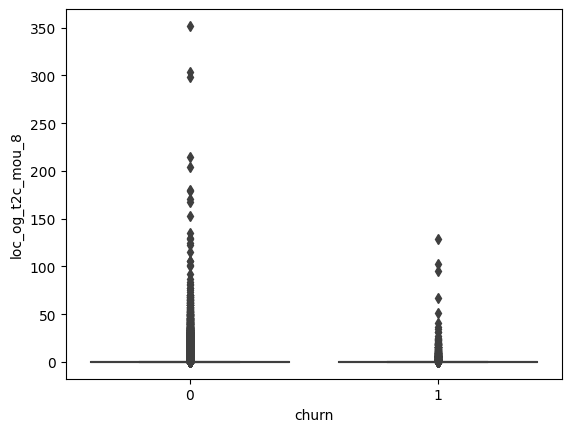

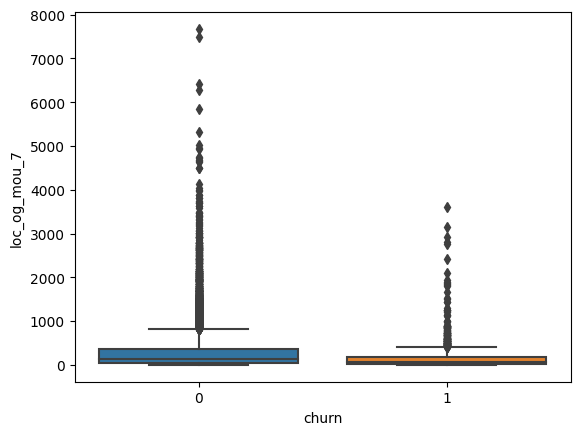

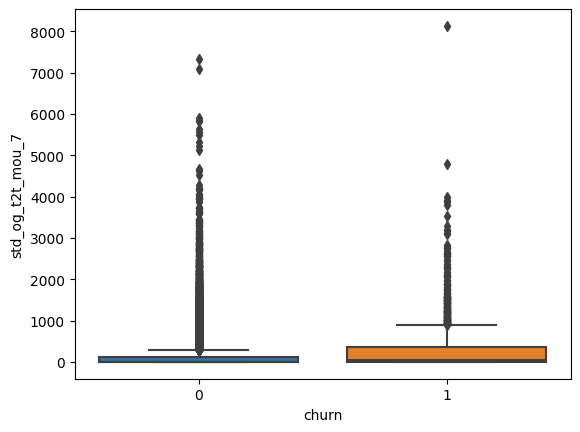

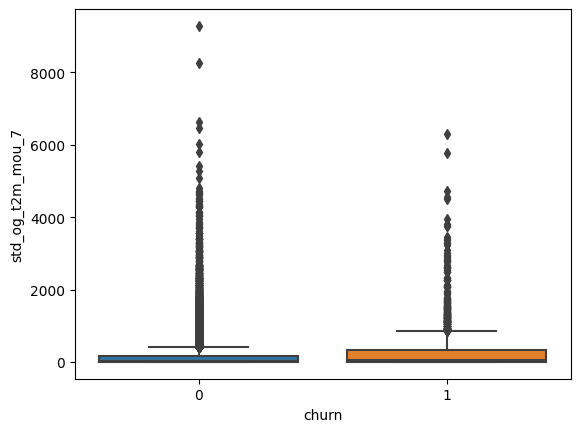

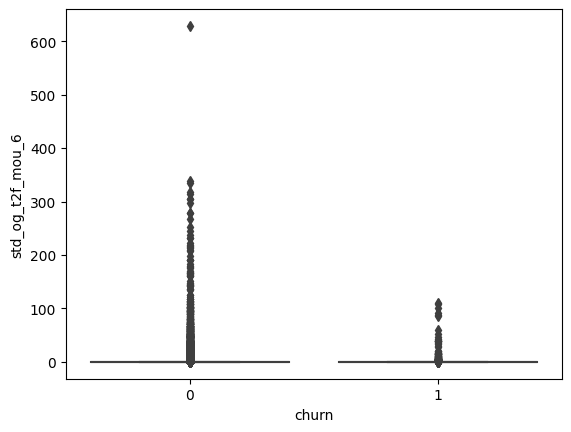

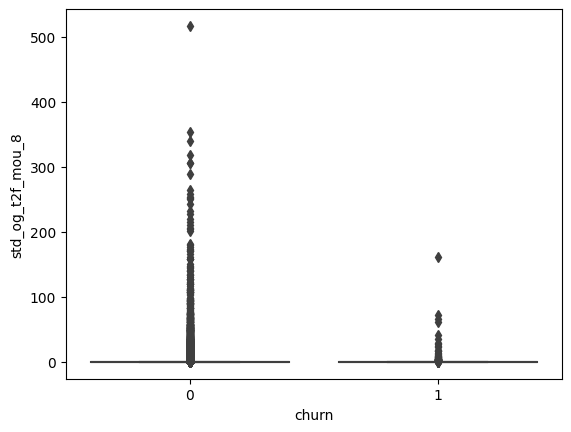

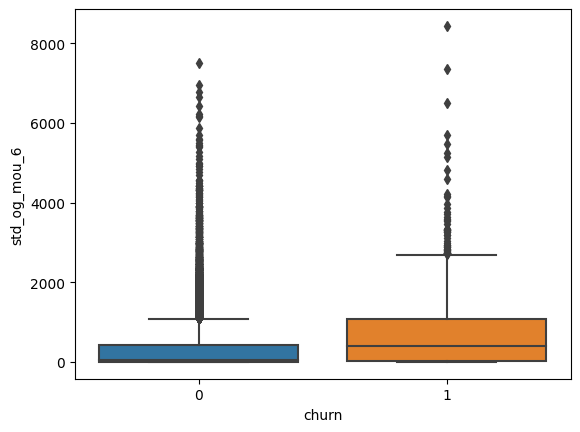

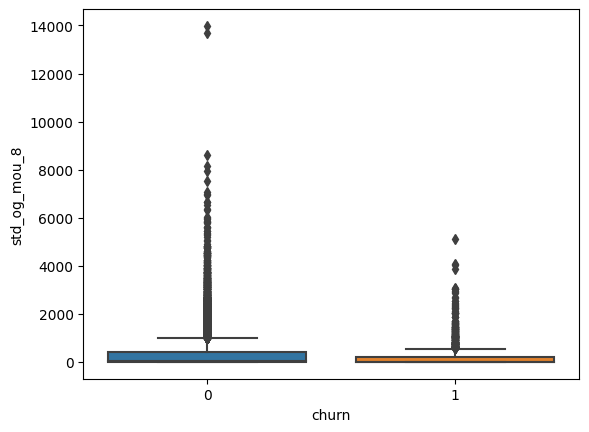

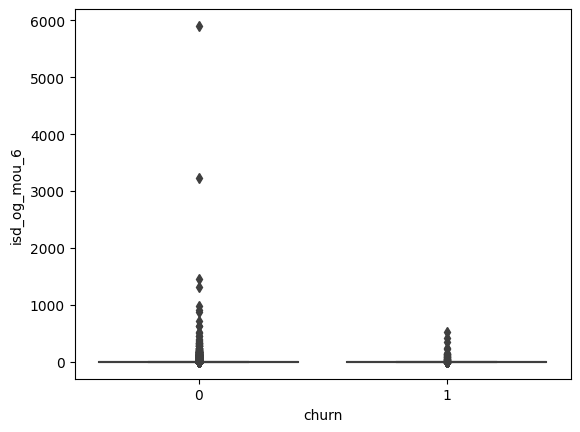

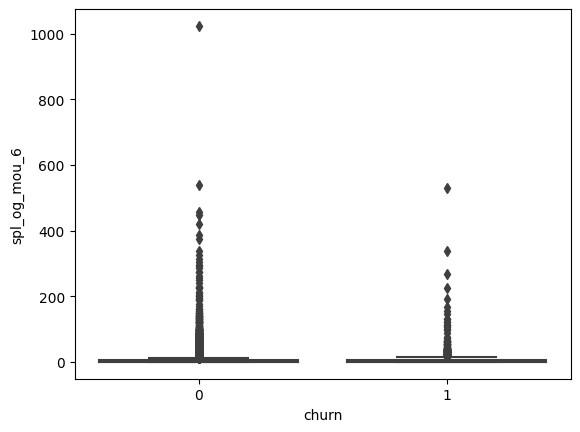

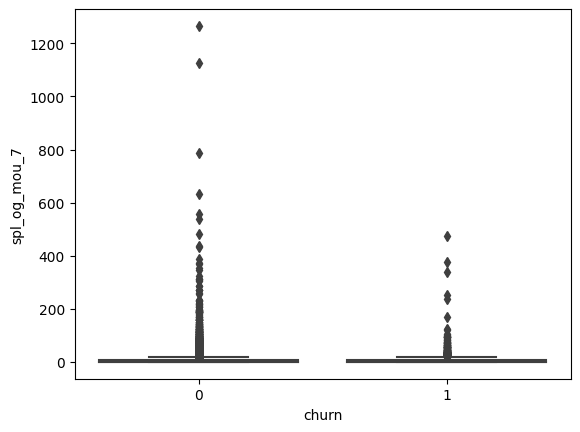

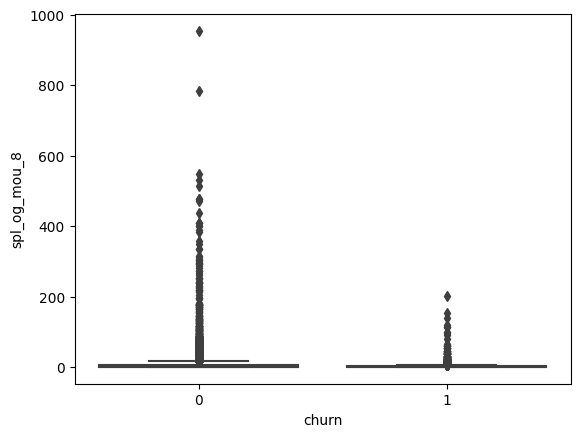

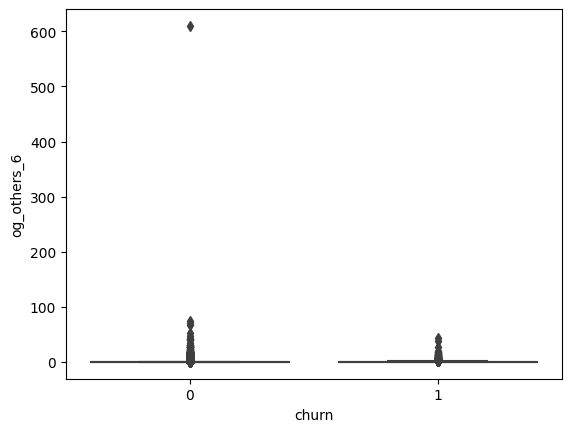

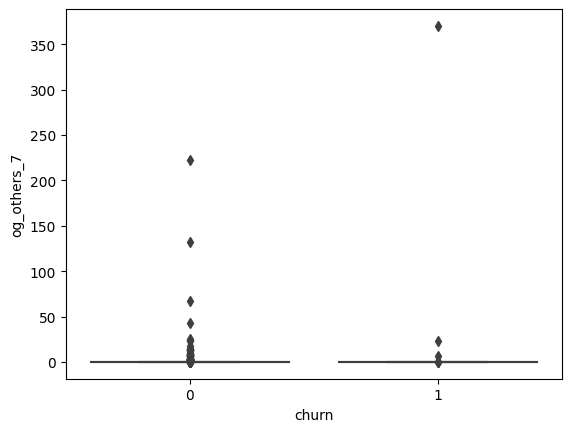

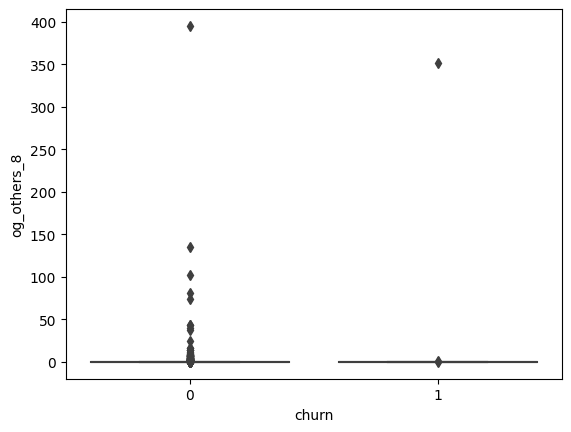

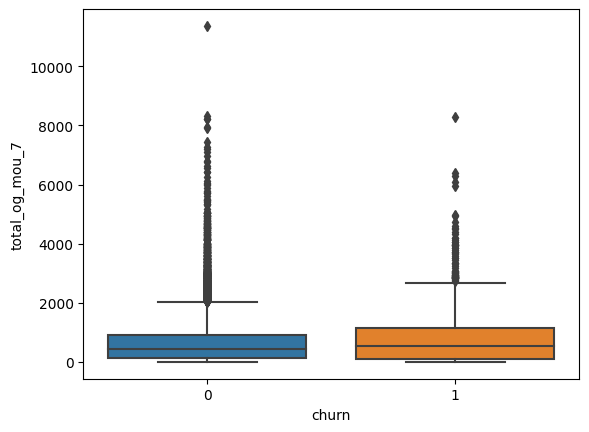

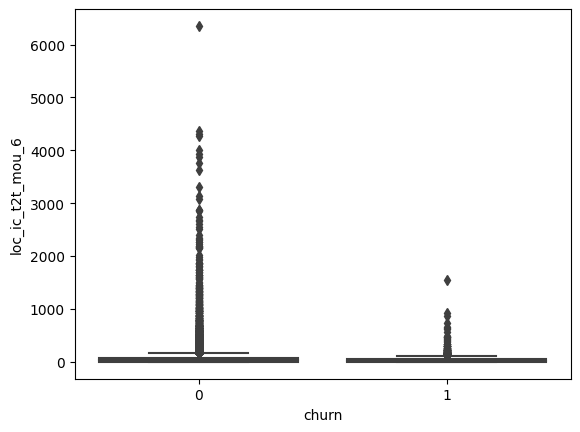

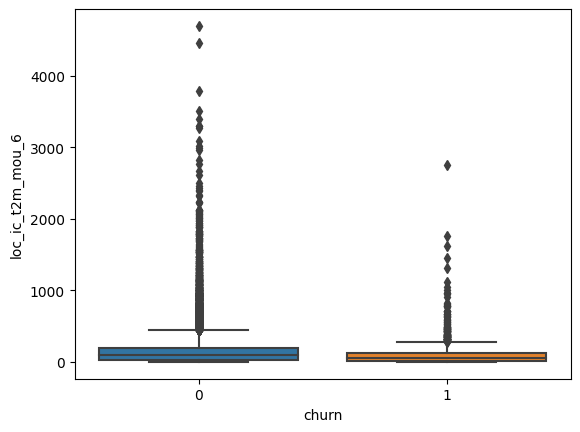

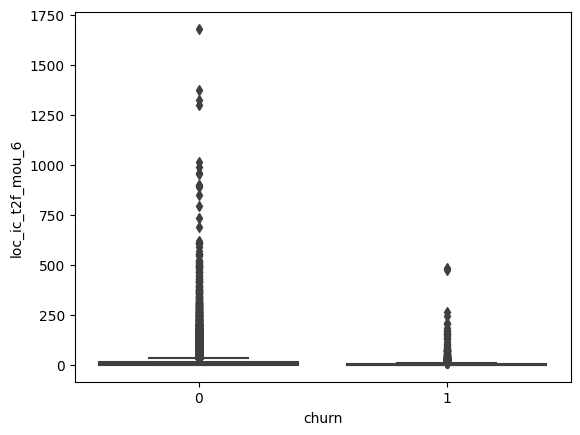

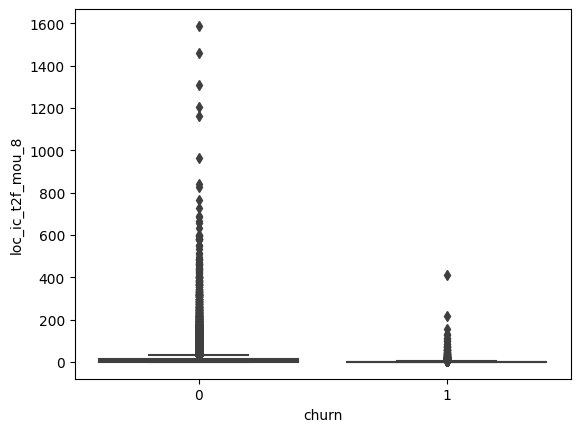

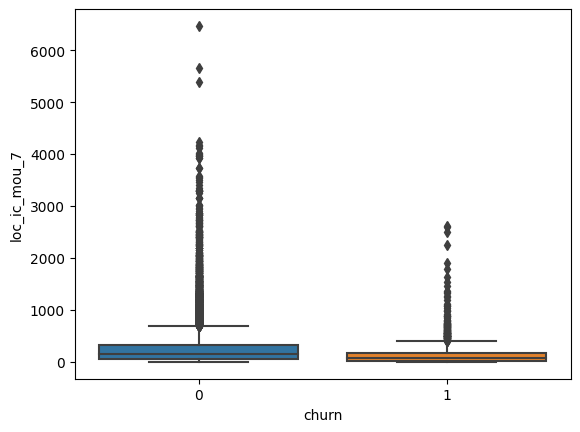

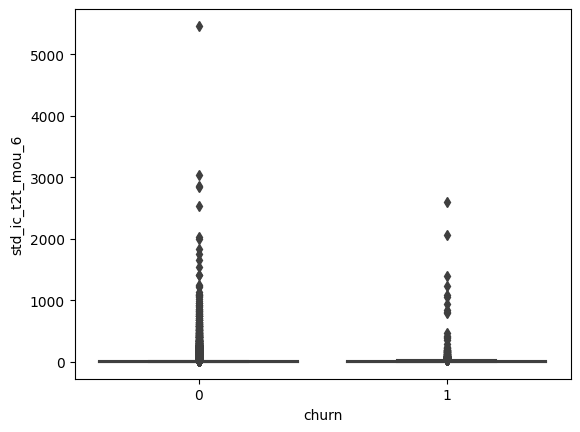

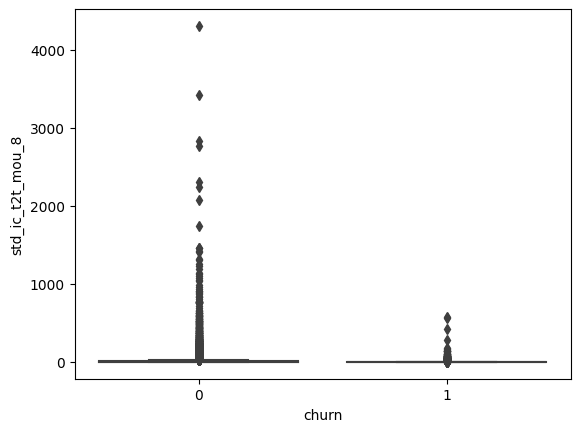

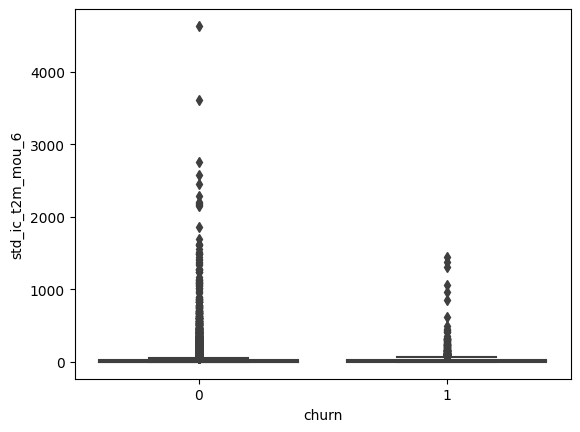

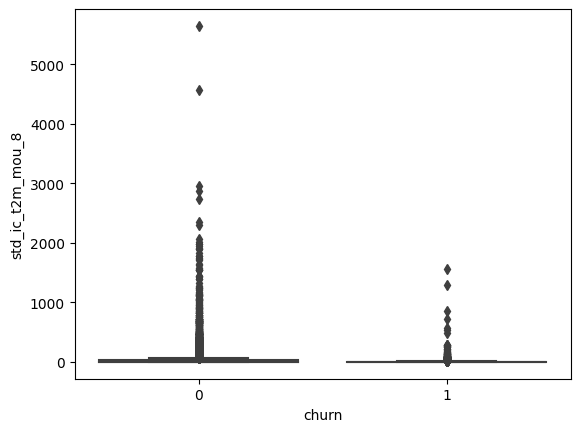

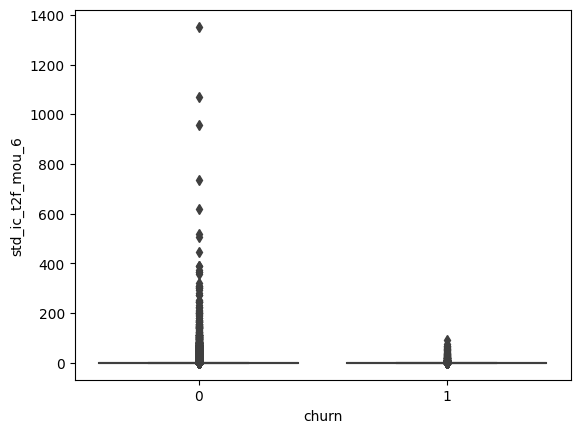

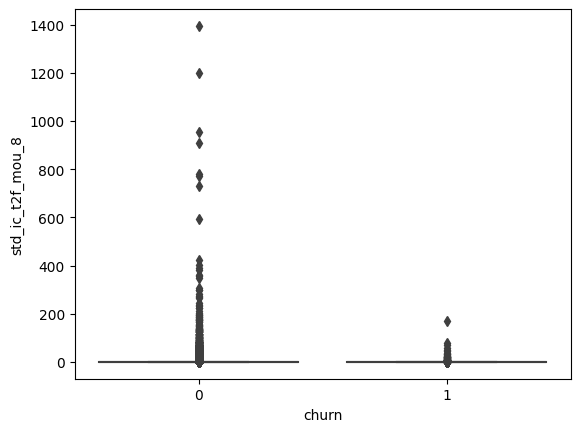

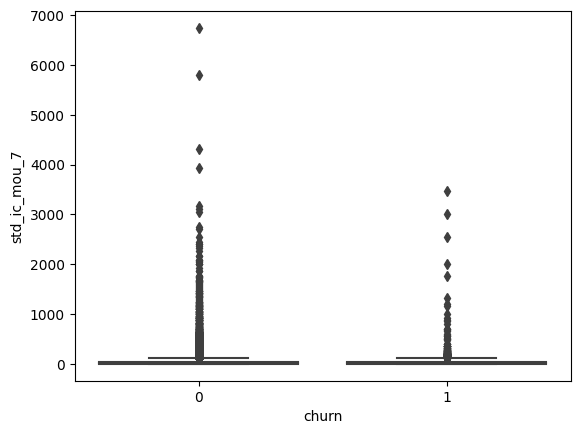

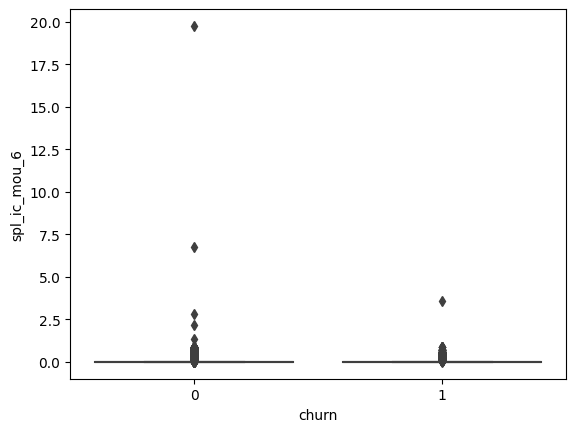

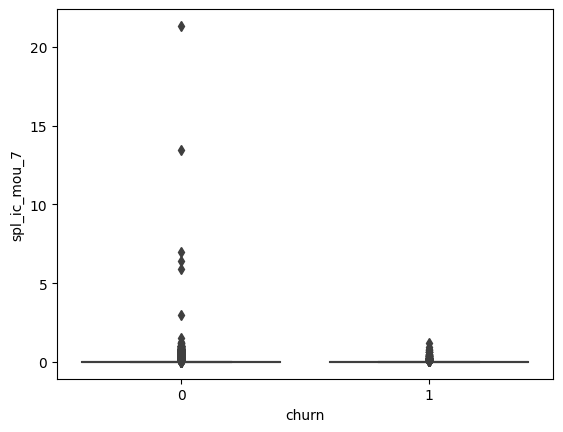

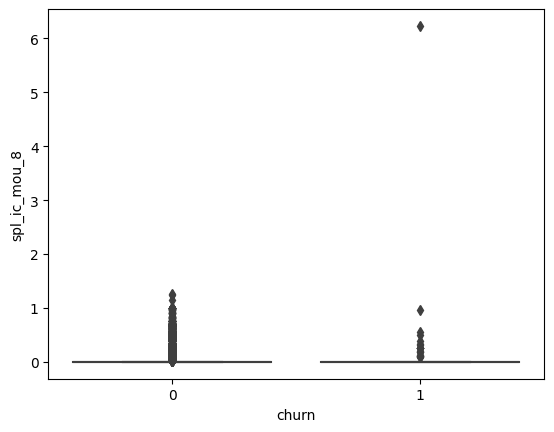

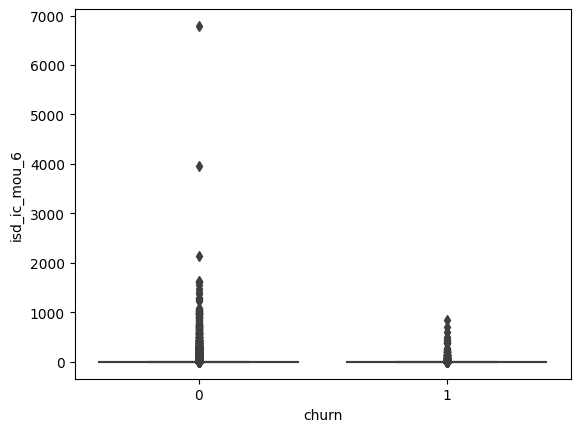

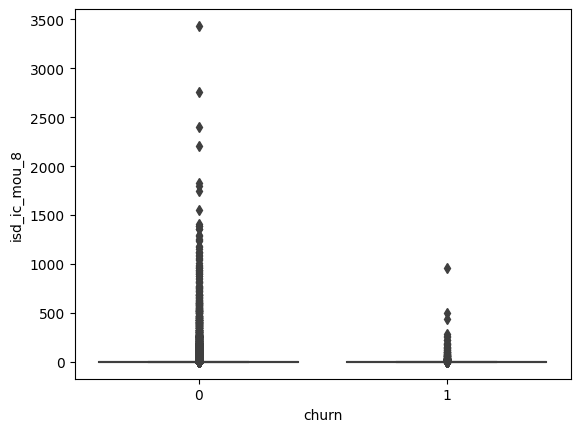

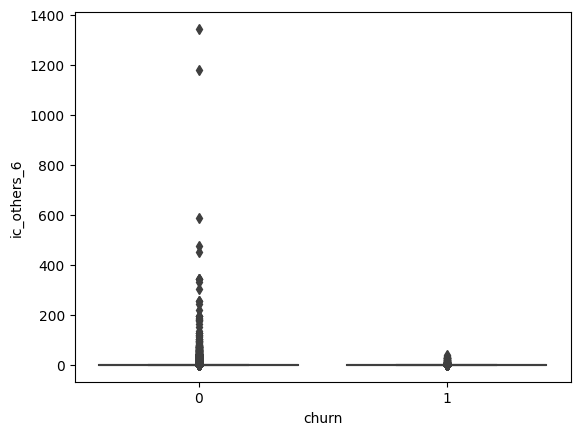

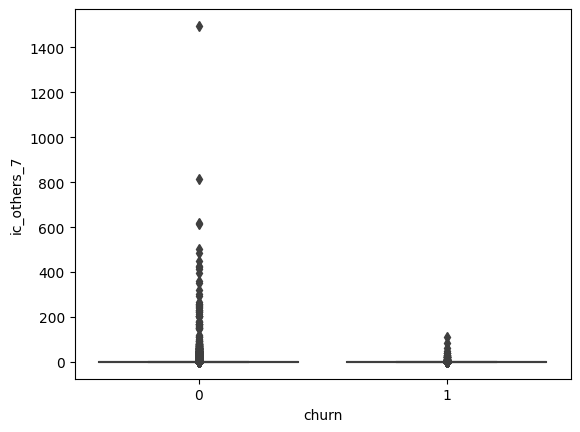

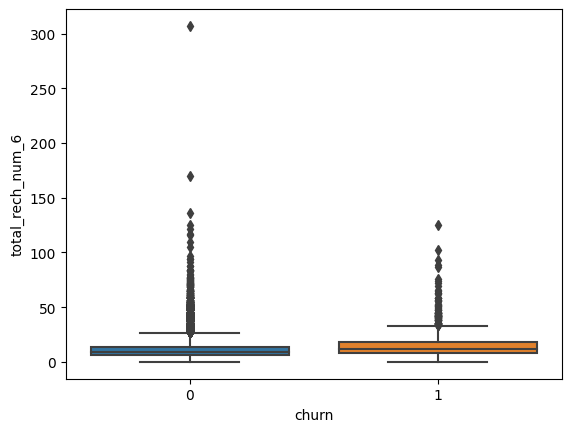

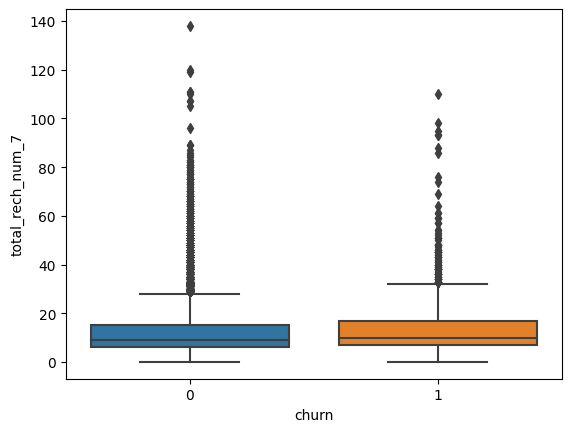

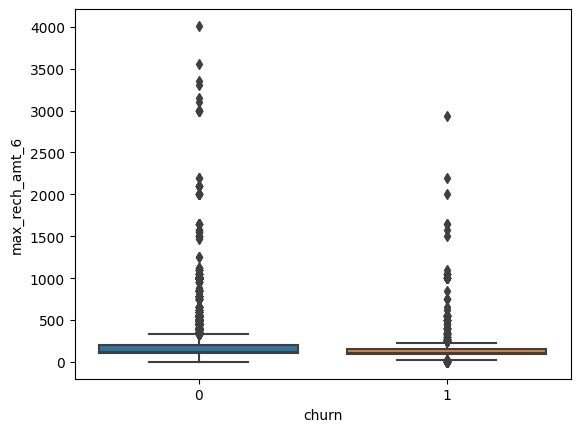

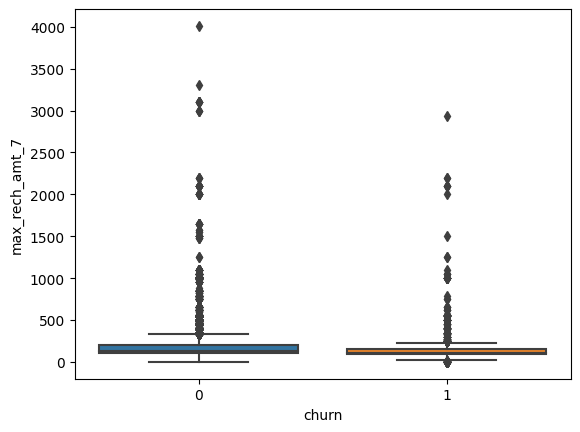

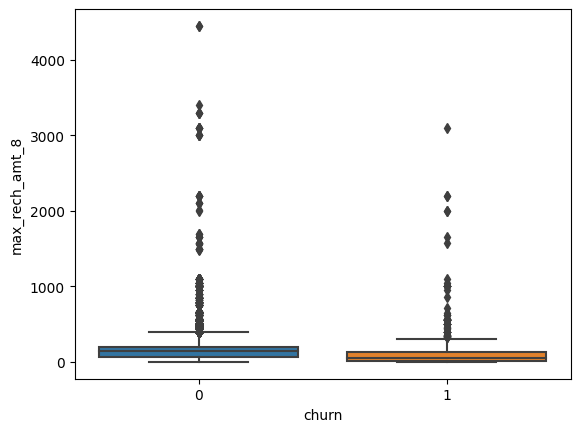

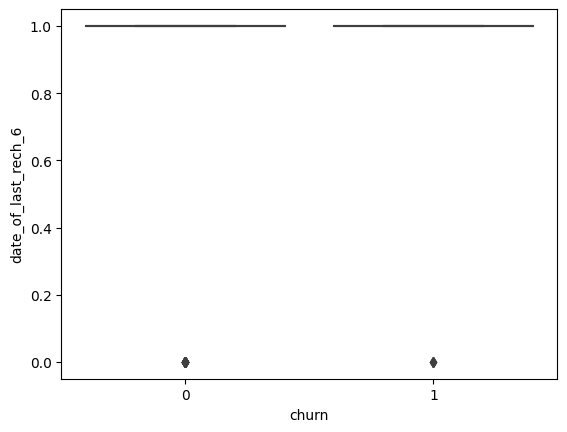

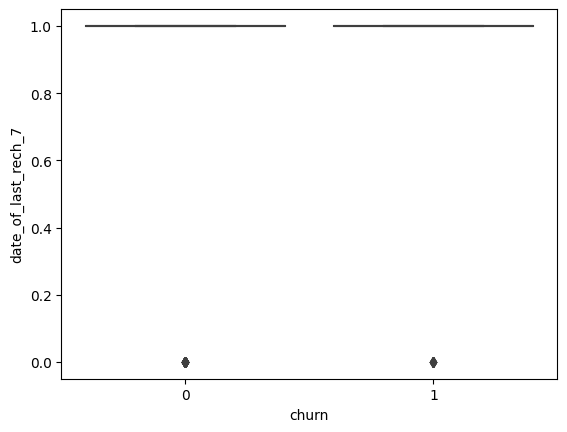

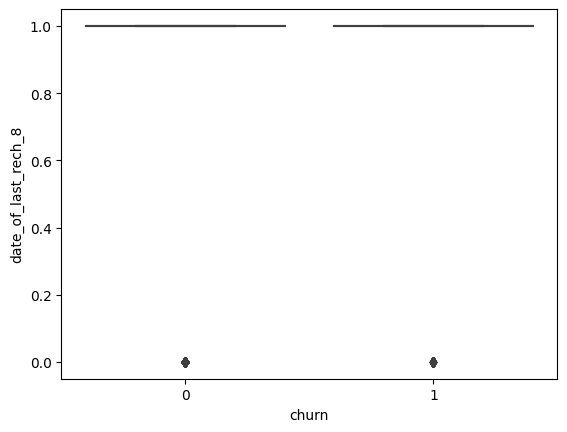

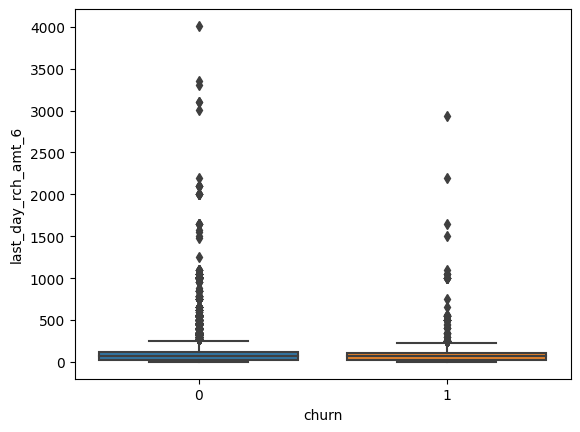

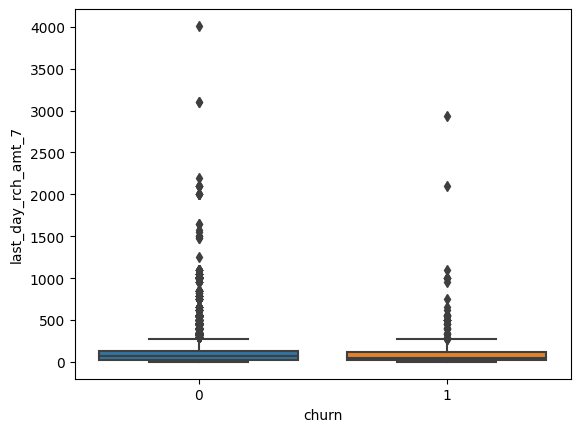

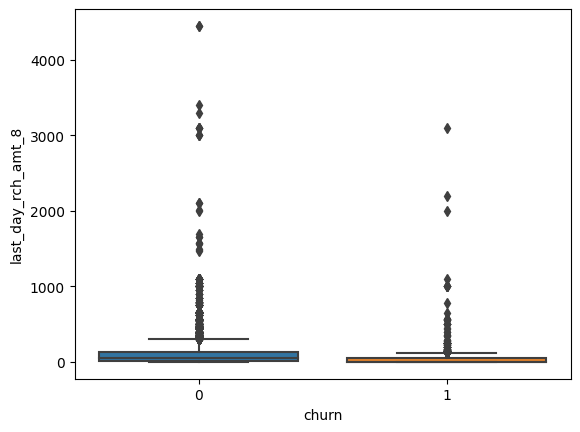

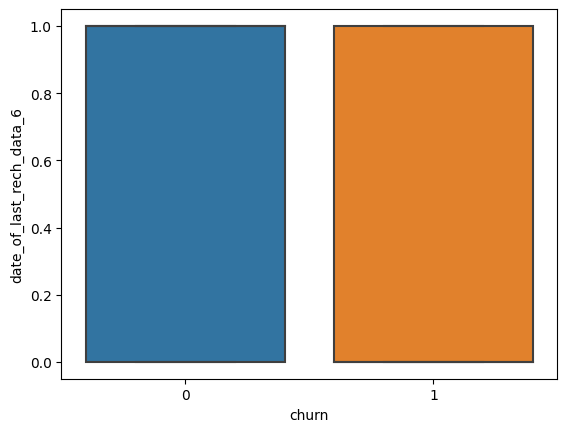

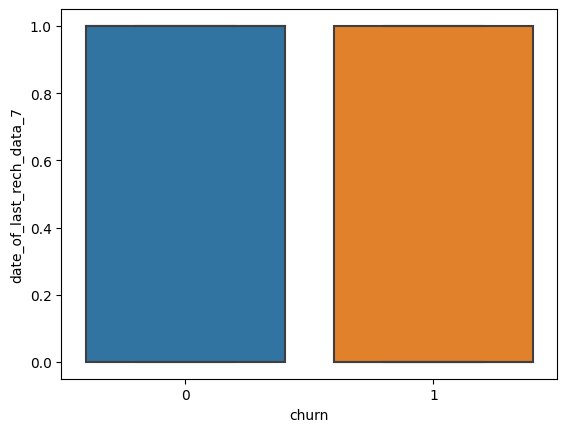

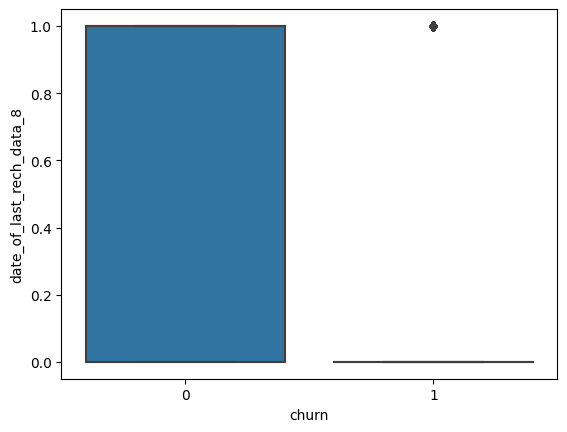

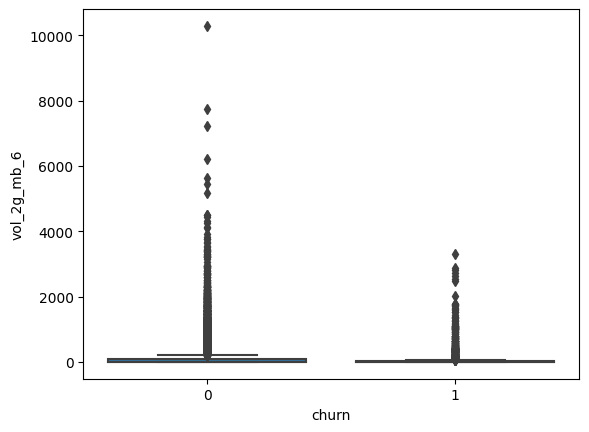

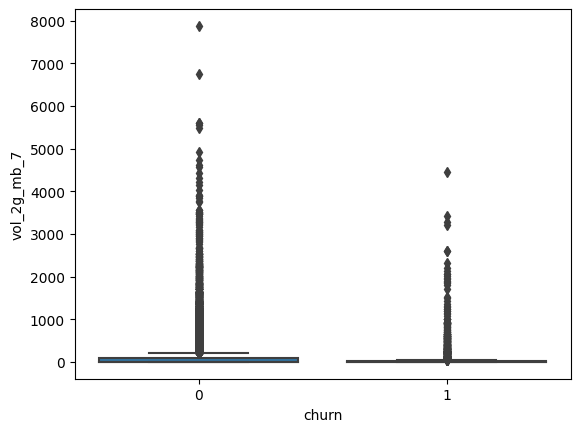

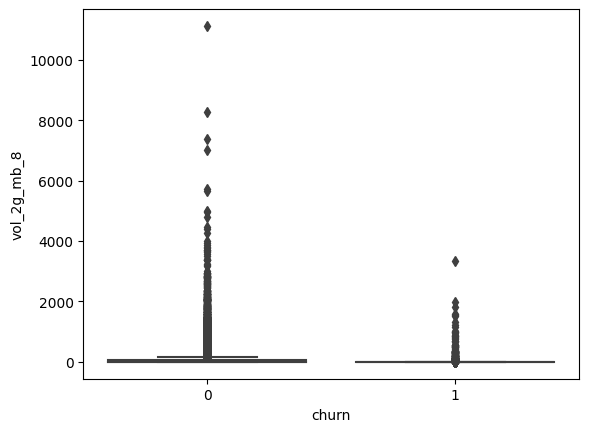

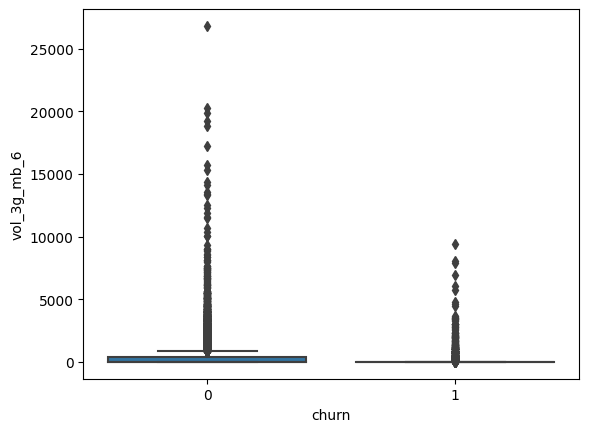

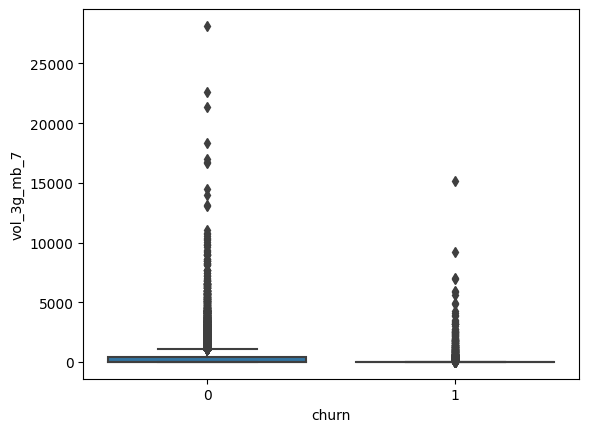

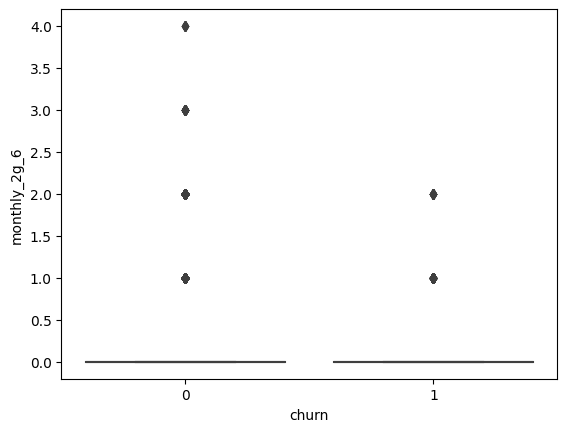

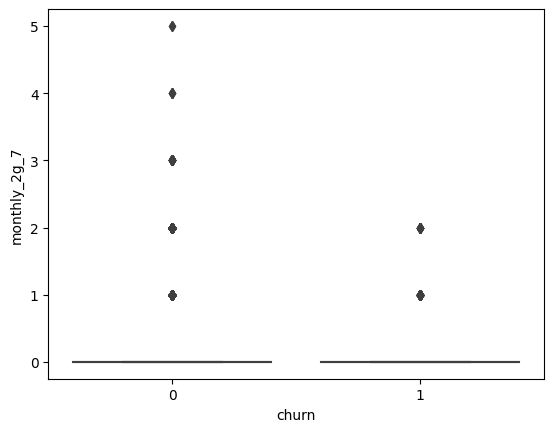

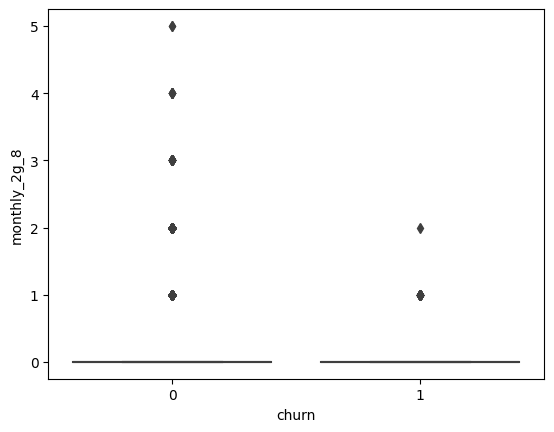

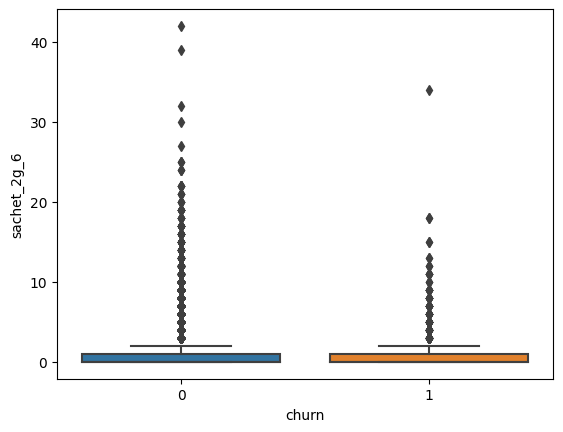

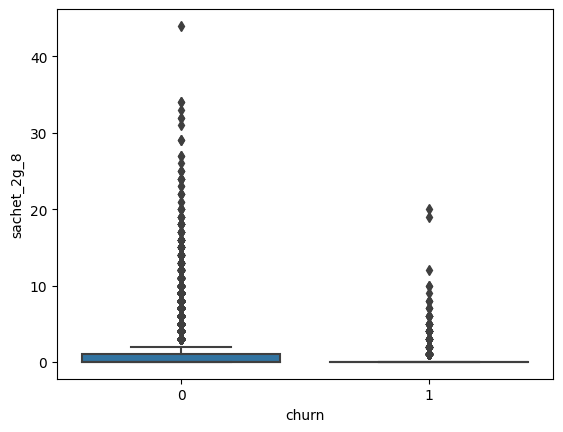

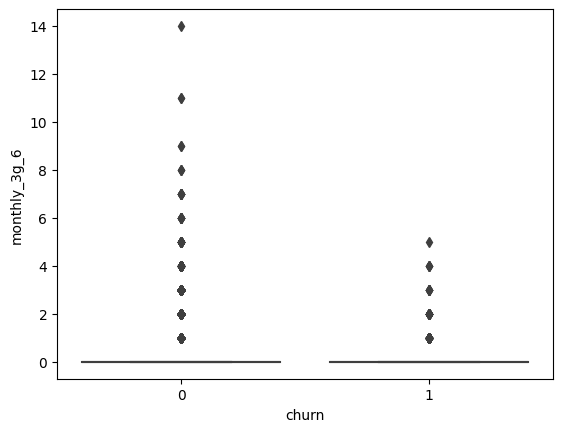

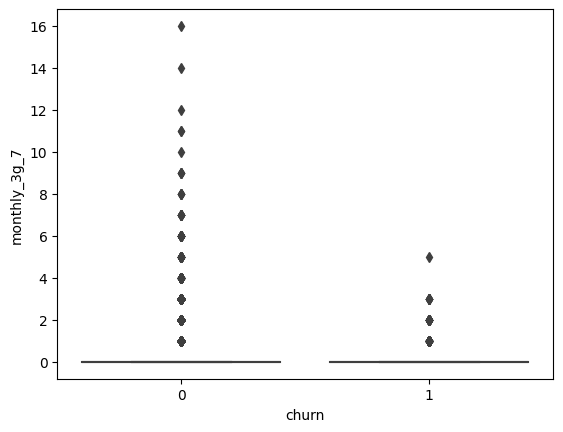

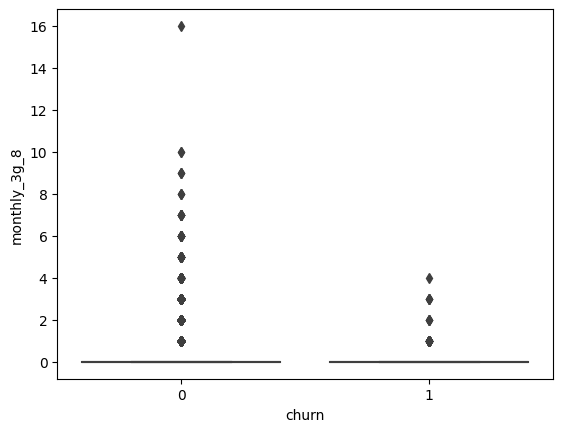

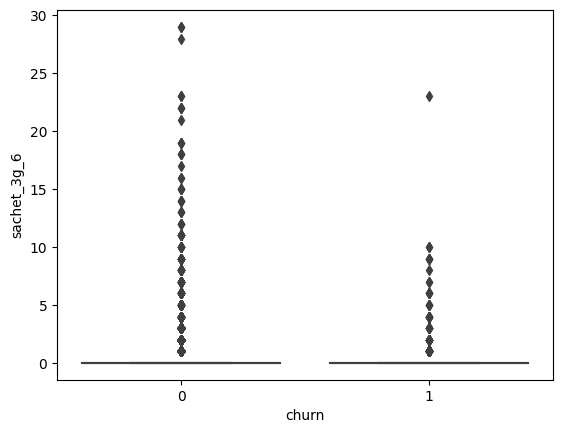

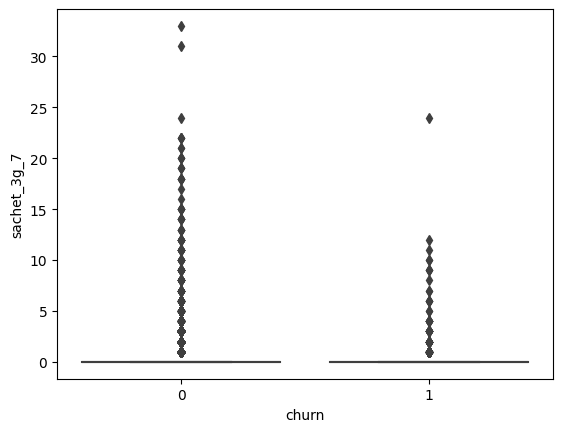

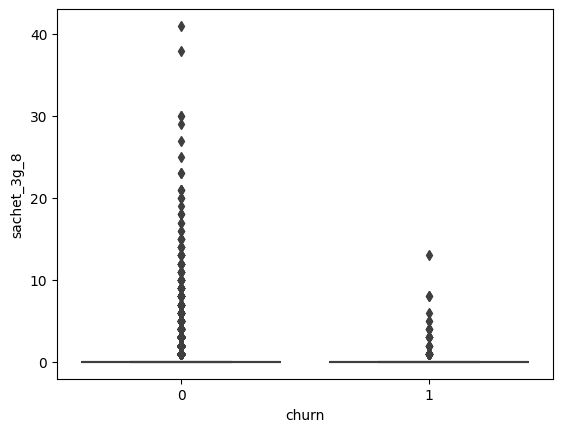

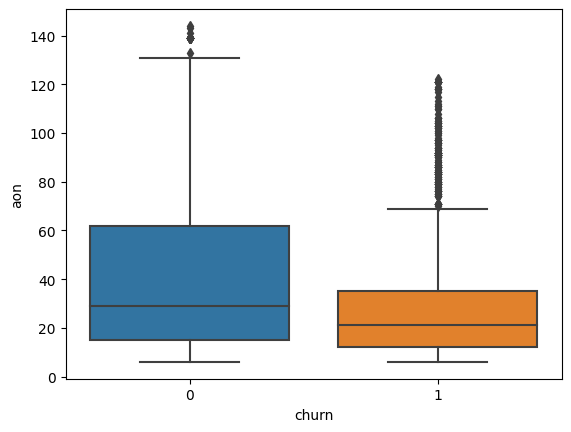

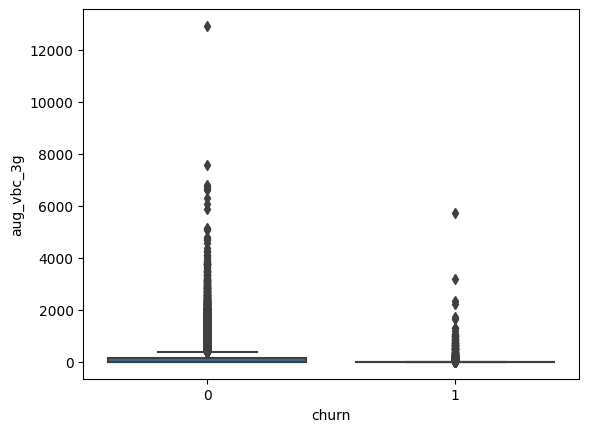

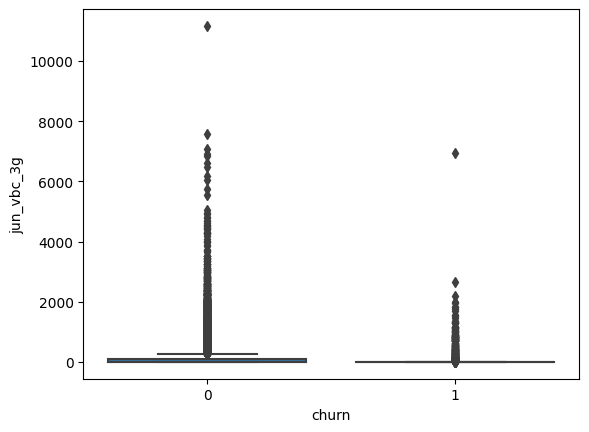

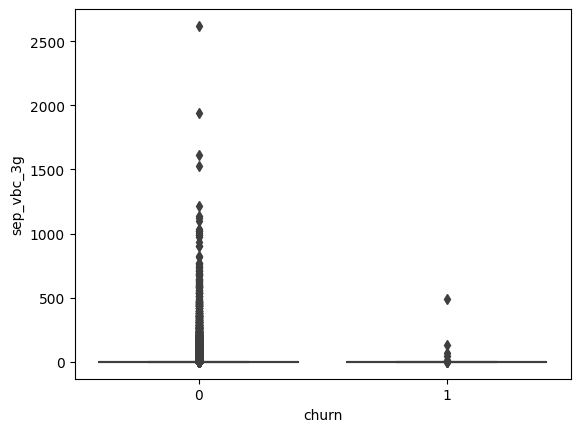

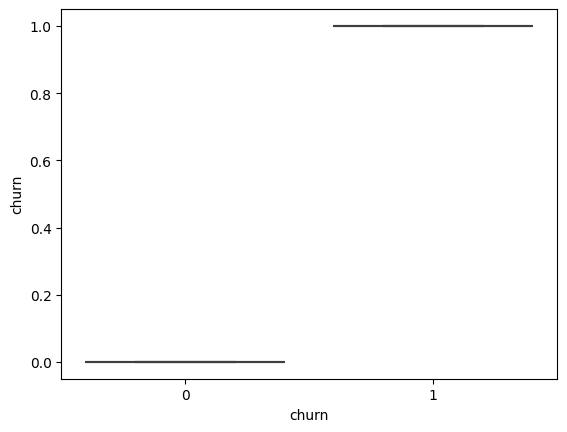

In [310]:
plot_df = df_reduced.select_dtypes(include =[np.number])
for col in plot_df.columns:
    sns.boxplot(x='churn', y=col, data=plot_df)
    plt.show()

From the above plots,
1. The customers using the network for longer period has less chance to churn. This implies a sense of loyalty.
2. Customers with max recharge amounts in high values seems to have less churn which is expected.
3. Customers with more number of recharges per month seems to show a slight increase in churn.
4. Customers with more minutes of outgoing calls to another networks seems to have less churn effect but with roaming outgoing seems to churn more.
5. Recharge in previous month seems to be a strong indicator for churn. 

## Derive some new feautres from the existing columns


AON in months

In [21]:
df_reduced['aon'] = df_reduced['aon']/30
df_reduced['aon'] = df_reduced['aon'].astype(int)

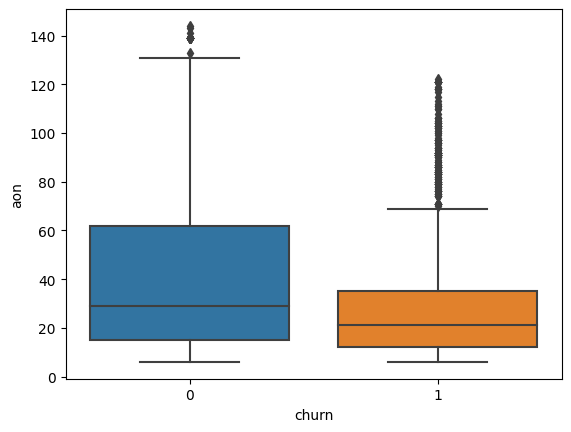

In [27]:
sns.boxplot(x='churn', y='aon', data=df_reduced)
plt.show()

# Feature scaling

In [35]:
processed_df = df_reduced.copy(deep=True)
processed_df.drop('mobile_number', axis=1, inplace=True) ##Removing Identifier
X = processed_df.drop(['churn'], axis=1)
y = processed_df['churn']

processed_df.drop('churn', axis=1, inplace=True)

In [36]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Train test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [38]:
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [39]:
print("X_tr: ", X_tr.shape)
print("y_tr: ", y_tr.shape)

print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

X_tr:  (37666, 88)
y_tr:  (37666,)
Imbalance in Training dataset: 1.0


# Model Building

## RFE

In [40]:
lr = LogisticRegression()
rfe = RFE(estimator = lr, n_features_to_select = 15) 
rfe = rfe.fit(X_tr, y_tr)

In [41]:
rfe_features = list(processed_df.columns[rfe.support_])
rfe_features

['onnet_mou_8',
 'offnet_mou_8',
 'roam_og_mou_8',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_mou_8',
 'total_og_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'spl_ic_mou_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sep_vbc_3g']

In [42]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [43]:
lr = LogisticRegression(random_state=0)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=0)

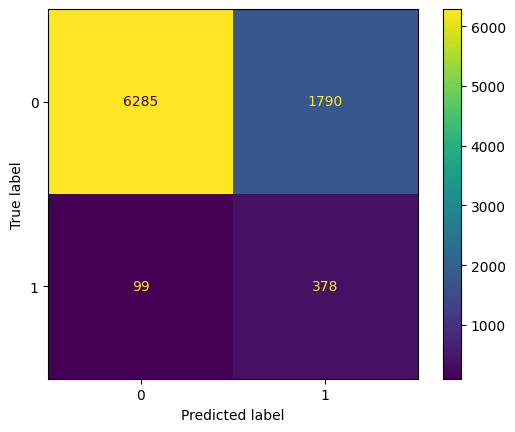

Accuracy on the test dataset: 0.7791159962581852


In [44]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [0, 1])
cm_display.plot()
plt.show()
print('Accuracy on the test dataset:',accuracy_score(y_test,y_pred))

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8075
           1       0.17      0.79      0.29       477

    accuracy                           0.78      8552
   macro avg       0.58      0.79      0.58      8552
weighted avg       0.94      0.78      0.84      8552



Conclusion from the above model:

Model Accuracy is approx 78% Confusion matix shows high false positive rate, which is not good.

### With PCA

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37666, 88)
(37666,)


In [47]:
pca = PCA(random_state=100)

pca.fit(X_tr)

PCA(random_state=100)

In [48]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(37666, 88)
(8552, 88)


In [49]:
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

y_pred = lr_pca.predict(X_test_pca)
y_pred_df = pd.DataFrame(y_pred)

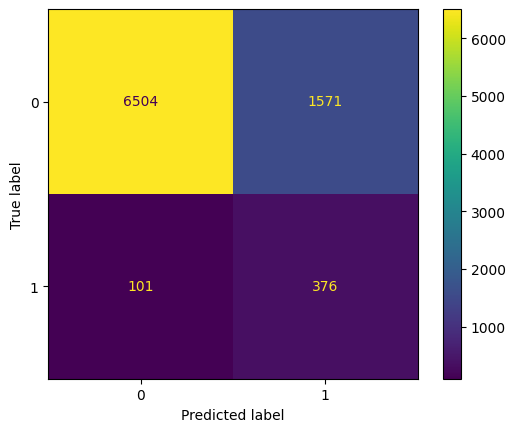

Accuracy of the logistic regression model with PCA:  0.804490177736202


In [50]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [0, 1])
cm_display.plot()
plt.show()
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

In [51]:
col = list(processed_df.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head()

,PC-1,PC-2,PC-3,Feature
0,0.186792,-0.029058,0.116247,arpu_6
1,0.122731,0.027935,0.147042,arpu_8
2,0.169611,-0.182284,-0.005148,onnet_mou_6
3,0.112567,-0.098834,0.036323,onnet_mou_8
4,0.207377,-0.136473,0.078339,offnet_mou_6


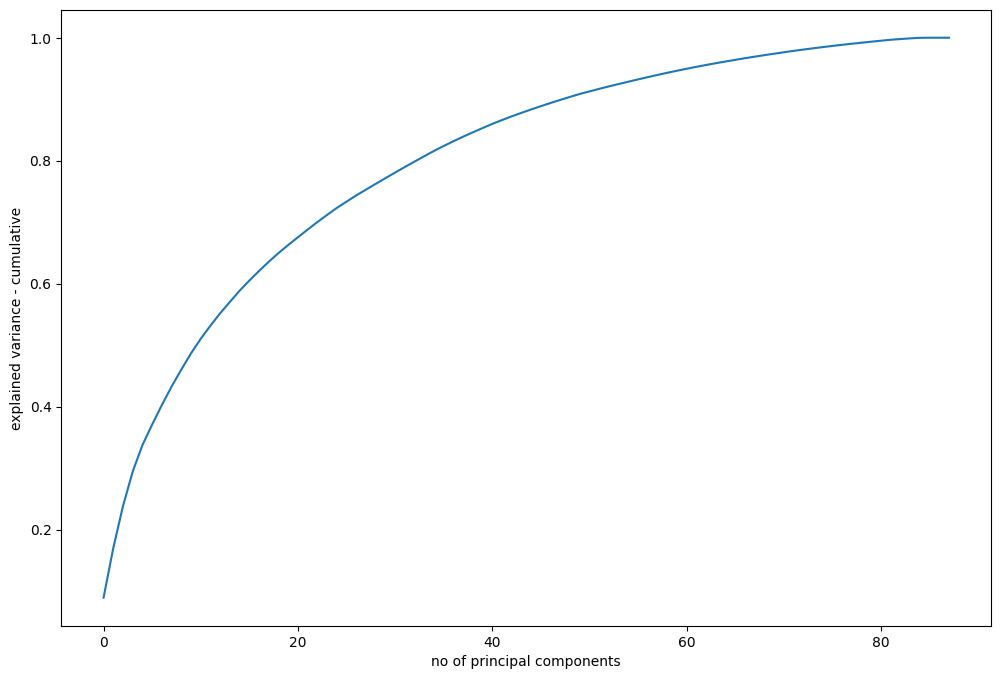

In [52]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [53]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# 47 columns explains 90% of the variance.

array([ 8.93, 17.  , 23.83, 29.44, 33.74, 37.09, 40.27, 43.27, 46.03,
       48.67, 51.04, 53.18, 55.19, 57.04, 58.86, 60.51, 62.07, 63.57,
       64.98, 66.29, 67.55, 68.79, 70.01, 71.17, 72.3 , 73.32, 74.33,
       75.28, 76.22, 77.14, 78.05, 78.96, 79.84, 80.71, 81.57, 82.38,
       83.14, 83.89, 84.6 , 85.29, 85.97, 86.6 , 87.2 , 87.77, 88.32,
       88.85, 89.37, 89.87, 90.36, 90.83, 91.25, 91.66, 92.06, 92.44,
       92.82, 93.2 , 93.57, 93.93, 94.28, 94.61, 94.93, 95.24, 95.54,
       95.83, 96.1 , 96.37, 96.64, 96.89, 97.13, 97.37, 97.6 , 97.83,
       98.04, 98.24, 98.44, 98.63, 98.81, 98.98, 99.15, 99.32, 99.48,
       99.63, 99.75, 99.86, 99.95, 99.97, 99.97, 99.97])

In [56]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[47]

89.86999999999996

In [57]:
pca_47 = PCA(n_components=47) ##Dimensionality reduction to 47
 
df_tr_pca_47 = pca_47.fit_transform(X_tr)
print(df_tr_pca_47.shape)

df_test_pca_47 = pca_47.transform(X_test)
print(df_test_pca_47.shape)

(37666, 47)
(8552, 47)


In [58]:
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_47, y_tr)

y_pred47 = lr_pca1.predict(df_test_pca_47)
df_y_pred = pd.DataFrame(y_pred47)

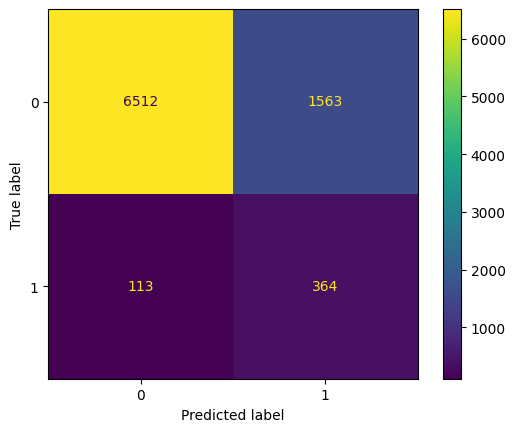

Accuracy with 47 PCAs:  0.804022450888681


In [59]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred47), display_labels = [0, 1])
cm_display.plot()
plt.show()
print("Accuracy with 47 PCAs: ",accuracy_score(y_test,y_pred47))

Conclusions from the above model:

Model has 81% Accuracy 47 features can explain 90% variance in the dataset.

## Decision Tree

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37666, 88)
(37666,)


Feature selection using lasso

In [61]:
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_tr) 
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(37666, 43)
[ 0  1  2  3  5  7 10 11 14 16 24 25 27 30 32 34 35 38 39 40 41 43 45 49
 57 60 61 64 67 68 69 70 73 74 75 76 77 80 82 83 84 85 87]


In [62]:
lasso_features = list(processed_df.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'max_rech_amt_7', 'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'date_of_last_rech_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g']


In [63]:
dtree = DecisionTreeClassifier()
dtree.fit(X_lasso, y_tr)

DecisionTreeClassifier()

In [64]:
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred = dtree.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8075
           1       0.25      0.49      0.33       477

    accuracy                           0.89      8552
   macro avg       0.61      0.70      0.63      8552
weighted avg       0.93      0.89      0.91      8552



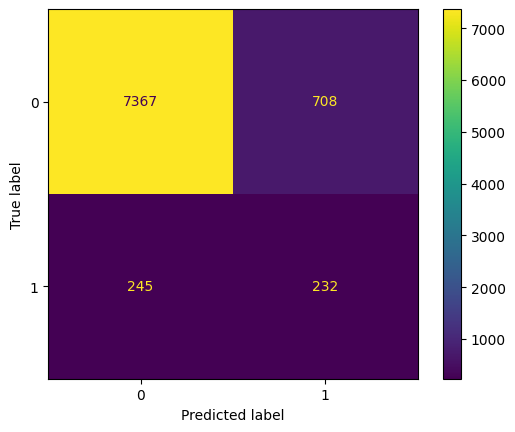

Decision Tree - Accuracy : 0.8885640785781104


In [65]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [0, 1])
cm_display.plot()
plt.show()
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred))

## Hyperparameter tuning

In [89]:
param_grid = {
    'max_depth': range(5, 20),
    'min_samples_leaf': range(25, 50, 25),
    'min_samples_split': range(50, 100, 50),
    'criterion': ["entropy", "gini"]
}

dtree = DecisionTreeClassifier(random_state=45)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = 2, verbose = 1) ## Cross validation 2

grid_search.fit(X_lasso, y_tr)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=45),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 20),
                         'min_samples_leaf': range(25, 50, 25),
                         'min_samples_split': range(50, 100, 50)},
             verbose=1)

In [90]:
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.8924494238836085


In [91]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=25,
                       min_samples_split=50, random_state=45)

In [92]:
dtree_model = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=25,
                       min_samples_split=50, random_state=45)
dtree_model.fit(X_lasso, y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=25,
                       min_samples_split=50, random_state=45)

In [93]:
y_pred = dtree_model.predict(X_test)

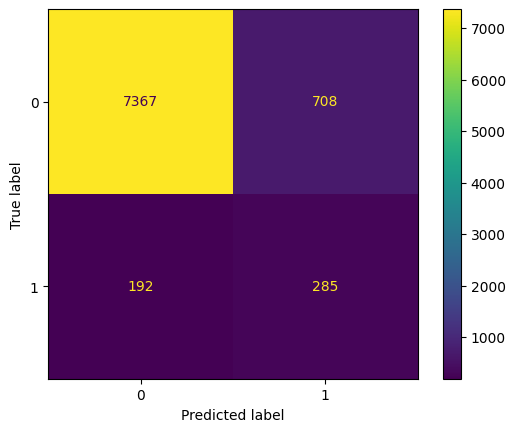

Accuracy Score for Decision Tree Final Model : 0.8947614593077643


In [94]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [0, 1])
cm_display.plot()
plt.show()
print ('Accuracy Score for Decision Tree Final Model :',accuracy_score(y_test,y_pred))

Conclusion from the above Decision Tree model

90% accuracy on the test dataset.
But lots of false positives in the confusion matrix.

## Random Forest

In [351]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_tr)

prediction_test = model_rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8075
           1       0.47      0.52      0.50       477

    accuracy                           0.94      8552
   macro avg       0.72      0.74      0.73      8552
weighted avg       0.94      0.94      0.94      8552



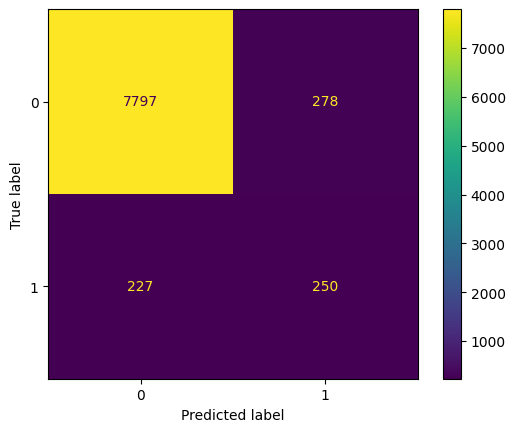

Random Forest Accuracy with Default Hyperparameter 0.9409494855004678


In [280]:
print(classification_report(y_test,prediction_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, prediction_test), display_labels = [0, 1])
cm_display.plot()
plt.show()
print ('Random Forest Accuracy with Default Hyperparameter',accuracy_score(y_test, prediction_test))

In [303]:
#param_grid = {
#    'max_depth': range(8, 20),
#    'n_estimators': range(50, 500, 50),
#    'min_samples_leaf': range(10,100,10),
#    'min_samples_split': range(20, 100, 20),
#    'criterion': ["entropy", "gini"]
#}

param_grid = {
    'n_estimators': range(50, 500, 50),
    'min_samples_split': range(20, 100, 20),
    'criterion': ["entropy", "gini"]
}

rf_model = RandomForestClassifier(random_state=45, n_jobs=80)
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 5, verbose = 1) ## Cross validation 5

grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=80, random_state=45),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_split': range(20, 100, 20),
                         'n_estimators': range(50, 500, 50)},
             verbose=1)

In [304]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.9558761377379579


In [305]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=20,
                       n_estimators=250, n_jobs=80, random_state=45)

In [306]:
rf_model = RandomForestClassifier(criterion='entropy', min_samples_split=20,
                       n_estimators=250, n_jobs=80, random_state=45)
rf_model.fit(X_lasso, y_tr)

RandomForestClassifier(criterion='entropy', min_samples_split=20,
                       n_estimators=250, n_jobs=80, random_state=45)

In [307]:
y_pred = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8075
           1       0.47      0.52      0.50       477

    accuracy                           0.94      8552
   macro avg       0.72      0.74      0.73      8552
weighted avg       0.94      0.94      0.94      8552



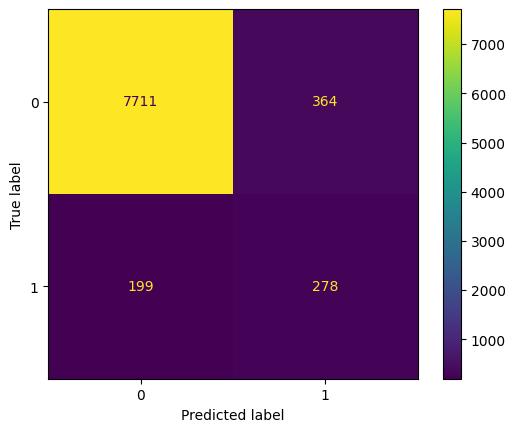

Accuracy Score for Random Forest Final Model : 0.9341674462114126


In [308]:
print(classification_report(y_test,prediction_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [0, 1])
cm_display.plot()
plt.show()
print ('Accuracy Score for Random Forest Final Model :',accuracy_score(y_test,y_pred))

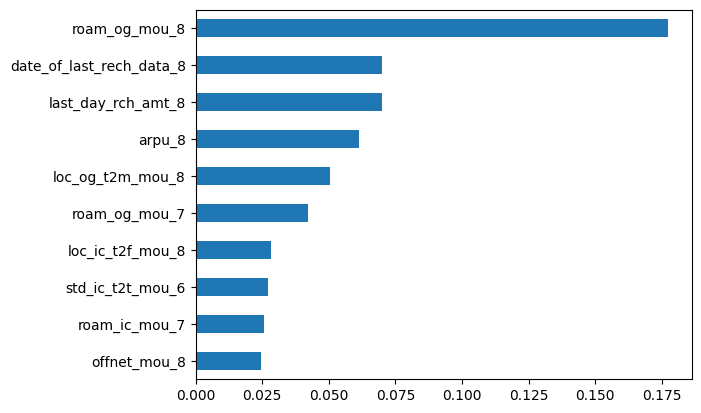

In [257]:
X = processed_df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X = X[lasso_features]
importances = rf_model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')
plt.show()

Conclusions from Random Forest
Roaming outgoing for Month 8, Recharge done in month 8 and Average Revenue Per Customer for Month 8 are the most important predictor variables to predict churn.

# Overall Conclusions and Suggestions

### Random Forest produced the best prediction results with about 94% accuracy.

#### Good offers to roaming outgoing calls will help in retaining customers.
#### Revenue Per Customer is a strong indicator of Churn which needs to monitored and recharge done in previous month also should be tracked to take preventive measures.
#### Customers having more years with the network shows a sense of loyalty which should be rewarded. This would also induce word of mouth marketing.
#### Cutomers with tenure less than 3 yrs are more likely to churn. So the company should invest in promotional offers to new customers for longer tenure.
